# 1. YouTube Data analysis.

In [14]:
import pandas as pd
comments=pd.read_csv(r"E:\DataSet\Uscomments.csv",on_bad_lines='skip')
'''
    on-bad_lines='skip' : used to skip bad lines from data set. Like we need remove the rows which contains more than usual
    colums. in below data-set if some of the rows have 6 or 7 columns then that types of rows should be skipped.
'''
comments.head()

C:\Users\Vikash Kumar\AppData\Local\Temp\ipykernel_5708\206780314.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments=pd.read_csv(r"E:\DataSet\Uscomments.csv",on_bad_lines='skip')


video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [28]:
comments.shape

(368157, 4)

In [18]:
#Check if the data set contains null value so that we can drop them in analysis
comments.isnull().sum()

video_id        0
comment_text    7
likes           0
replies         0
dtype: int64

In [19]:
#NOTE: As we can see from above output that total 7 rows where there is no comment_text. So we need to remove it.
comments.dropna(inplace=True)
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# Normal Sentiment Analysis

In [22]:
'''
    Sentiment Analysis generally deals with sentiment of customer feedback. like positive,negative or neutral.
    So to analyze the sentiment we define the polarity which ranges between [-1,1].
    
    To find the polarity over comments we will use TextBlob Package methods.
'''
from textblob import TextBlob
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment

Sentiment(polarity=0.0, subjectivity=0.1)

In [23]:
#to get polarity from dictionary like field we need to access polarity
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [32]:
# So we need perform polarity calculation over whole dataset and add a new column to the dataset to see comment polarity
comment_polarity=[]
for cmnt in comments['comment_text']:
    try:
        comment_polarity.append(TextBlob(cmnt).sentiment.polarity)
    except:
        print('there is null in comment_text & polarity added like 0')
        comment_polarity.append(0)
comments['polarity']=comment_polarity
comments.head(10)

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   
5  XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6  XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7  XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8  XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9  XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   

  replies  polarity  
0       0  0.000000  
1       0  0.000000  
2       0  0.000000  
3       0  0.000000  
4       0  0.000000  
5       0  0.000000  
6       0  0.000000  
7       0  0.000000  
8       0  0.800000  
9       0 -0.135714

# Wordcloud Analysis

it's a gaphical representation of frequently used text. So we will identify the most used word in comment_text.

In [52]:
from wordcloud import WordCloud,STOPWORDS
'''
    STOPWORDS: Are the set of words which has no meaning in analysis.So we need to discard these values for wordcloud analysis
'''
#at first we categorize the positive comments and negative comments based on polarity value
positive_comments=comments[comments['polarity']==1]
negative_comments=comments[comments['polarity']==-1]

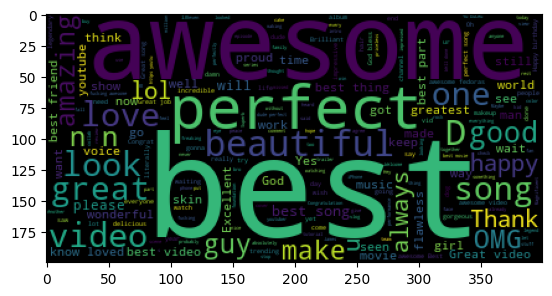

In [53]:
import matplotlib.pyplot as plt
all_positive_comment=' '.join(positive_comments['comment_text'])
x=WordCloud(stopwords=set(STOPWORDS)).generate(all_positive_comment)
plt.imshow(x)

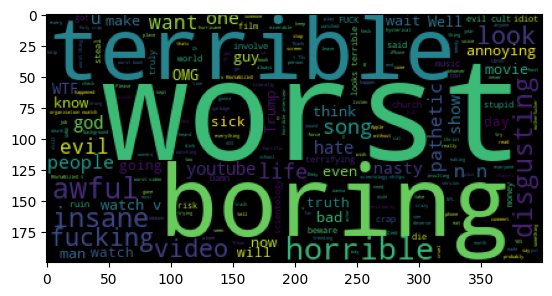

In [54]:
y=WordCloud(stopwords=set(STOPWORDS)).generate(' '.join(negative_comments['comment_text']))
plt.imshow(y)

# Emoji Analysis

In [55]:
from emoji import EMOJI_DATA
emoji_list=[]
for comment in comments['comment_text']:
    for char in comment:
        if char in EMOJI_DATA:
            emoji_list.append(char)
emoji_list[:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [74]:
from collections import Counter
emoji_count=Counter(emoji_list)
top_emoji_list=emoji_count.most_common(10)
top_emoji_list[1][0]

'😂'

In [76]:
#Now we will make 2 list for making the bar chart
emoji_count=[]
emoji_symbol=[]
for symbol,count in top_emoji_list:
    emoji_count.append(count)
    emoji_symbol.append(symbol)
emoji_symbol

['😍', '😂', '❤', '🔥', '😭', '😬', '😘', '👏', '👍', '💖']

In [77]:
emoji_count

[19690, 19655, 16407, 4782, 4617, 3251, 3062, 3008, 2905, 2776]

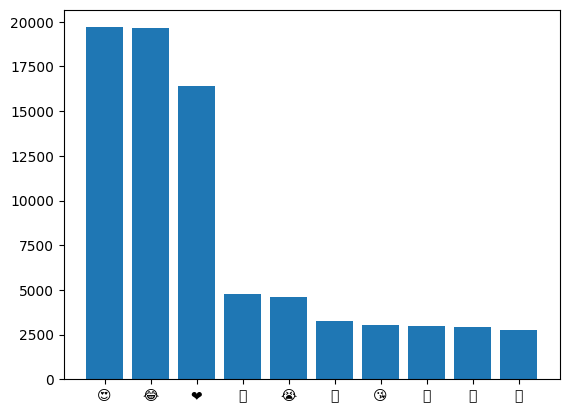

In [87]:
import matplotlib.pyplot as plt
plt.bar(emoji_symbol,emoji_count)
plt.show()

# Accessing all csv at a time for specific analysis.

Scannario: Suppose we have to collect YouTube data and perform some analysis. but we have the data in different files for
           different countries so for analysis purpose we need to concat all data at one dataframe.

We will use the OS Package to see all the available csv data in the folder and we will concatenate over single dataframe.


In [2]:
import os
file_list=[file for file in os.listdir(r"D:\Data_Set") if '.csv' in file]
file_list

['GBvideos.csv', 'USvideos.csv']

In [3]:
import pandas as pd
full_df=pd.DataFrame()
for file in file_list:
    current_df=pd.read_csv(r"D:\Data_Set"+'/'+file,on_bad_lines='skip',encoding='iso-8859-1')
    full_df=pd.concat([current_df,full_df],ignore_index=True)
full_df.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0        iPhone X â Introducing iPhone X â Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [4]:
full_df.drop_duplicates(inplace=True)

In [5]:
full_df.shape

(8211, 11)

In [6]:
full_df.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0        iPhone X â Introducing iPhone X â Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [7]:
json_data=pd.read_json(r'D:\Data_Set\GB_category_id.json')
json_data.shape

(31, 3)

In [8]:
full_df['category_id'].unique()

array([24, 28, 22, 23,  1, 26, 10, 25, 17, 27,  2, 20, 15, 29, 19],
      dtype=int64)

In [9]:
json_data.head()

kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   
3  youtube#videoCategoryListResponse   
4  youtube#videoCategoryListResponse   

                                                etag  \
0  "m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...   
1  "m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...   
2  "m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...   
3  "m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...   
4  "m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4  {'kind': 'youtube#videoCategory', 'etag': '"m2...

In [10]:
json_data.columns

Index(['kind', 'etag', 'items'], dtype='object')

In [11]:
json_data['kind'][0]

'youtube#videoCategoryListResponse'

In [12]:
json_data['etag'][0]

'"m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2qTj13hkQZk"'

In [13]:
json_data['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

As we can see 'items' columns has title in dictionary so we need to collect it.

In [14]:
json_data['items'][0].items()

dict_items([('kind', 'youtube#videoCategory'), ('etag', '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"'), ('id', '1'), ('snippet', {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True})])

In [15]:
category_dict = dict()
for x in json_data['items'].values:
    category_dict[int(x['id'])] = x['snippet']['title']
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

Now we need to map dictionary value into dataframe with the help of map() function to each category_id

In [16]:
full_df['Category_name']=full_df['category_id'].map(category_dict)
full_df[['category_id','Category_name']].head()

category_id         Category_name
0           24         Entertainment
1           28  Science & Technology
2           22        People & Blogs
3           28  Science & Technology
4           23                Comedy

Now our task is to count the likes and dislike as per category of video

In [17]:
# Using groupby() and count()
like_count = full_df.groupby(['Category_name'])['likes'].sum()
like_count

Category_name
Autos & Vehicles          1022265
Comedy                   39394513
Education                 5392959
Entertainment            42692517
Film & Animation         11153363
Gaming                    4067918
Howto & Style            26843480
Music                   124810580
News & Politics           1886809
People & Blogs           37840452
Pets & Animals            2482815
Science & Technology     10579725
Sports                   12066788
Travel & Events            542932
Name: likes, dtype: int64

In [18]:
dislike_count = full_df.groupby(['Category_name'])['dislikes'].sum()
dislike_count

Category_name
Autos & Vehicles          38653
Comedy                   901153
Education                280476
Entertainment           1887734
Film & Animation         445497
Gaming                   181165
Howto & Style            680771
Music                   4614577
News & Politics          399090
People & Blogs          3142359
Pets & Animals            49271
Science & Technology     955097
Sports                   328377
Travel & Events           12367
Name: dislikes, dtype: int64

In [19]:
view_count = full_df.groupby(['Category_name'])['views'].sum()
view_count

Category_name
Autos & Vehicles          52258876
Comedy                   892864369
Education                166302924
Entertainment           1505446176
Film & Animation         522786540
Gaming                   119122331
Howto & Style            514209360
Music                   2827238085
News & Politics          284095056
People & Blogs          1018941022
Pets & Animals           110105980
Science & Technology     470489102
Sports                   445372217
Travel & Events           19787535
Name: views, dtype: int64

In [20]:
comment_count = full_df.groupby(['Category_name'])['comment_total'].sum()
comment_count

Category_name
Autos & Vehicles          124660
Comedy                   3925112
Education                 813501
Entertainment            5267849
Film & Animation         1360490
Gaming                    745240
Howto & Style            2869949
Music                   16372474
News & Politics           673523
People & Blogs           4876106
Pets & Animals            383695
Science & Technology     1431065
Sports                   1256618
Travel & Events            58900
Name: comment_total, dtype: int64

In [21]:
like_dislike_frame=pd.concat([like_count,dislike_count],axis=1)
like_dislike_frame.head()

likes  dislikes
Category_name                       
Autos & Vehicles   1022265     38653
Comedy            39394513    901153
Education          5392959    280476
Entertainment     42692517   1887734
Film & Animation  11153363    445497

In [22]:
like_dislike_frame.reset_index(drop=False,inplace=True)
like_dislike_frame

Category_name      likes  dislikes
0       Autos & Vehicles    1022265     38653
1                 Comedy   39394513    901153
2              Education    5392959    280476
3          Entertainment   42692517   1887734
4       Film & Animation   11153363    445497
5                 Gaming    4067918    181165
6          Howto & Style   26843480    680771
7                  Music  124810580   4614577
8        News & Politics    1886809    399090
9         People & Blogs   37840452   3142359
10        Pets & Animals    2482815     49271
11  Science & Technology   10579725    955097
12                Sports   12066788    328377
13       Travel & Events     542932     12367

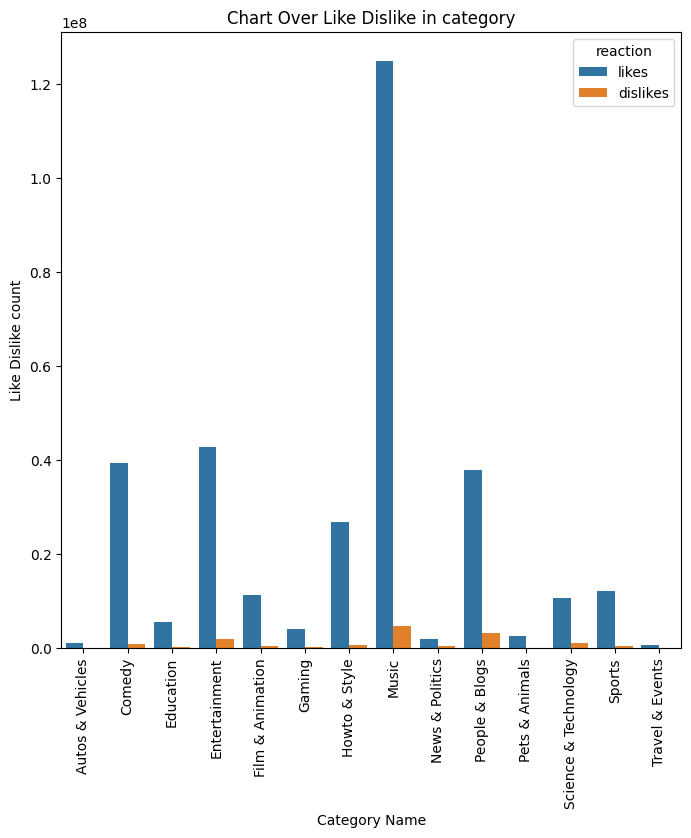

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
df_melted = like_dislike_frame.melt(id_vars='Category_name', var_name='reaction', value_name='count')
plt.figure(figsize=(8,8))
sns.barplot(x='Category_name', y='count', hue='reaction', data=df_melted)
plt.xticks(rotation='vertical')
plt.xlabel('Category Name')
plt.ylabel('Like Dislike count')
plt.title('Chart Over Like Dislike in category')
plt.show()

Categorize the like, dislike rate in every category of videos.

In [25]:
view_df=pd.concat([like_count,dislike_count,view_count,comment_count],axis=1)
view_df.reset_index(drop=False,inplace=True)
view_df.head()

Category_name     likes  dislikes       views  comment_total
0  Autos & Vehicles   1022265     38653    52258876         124660
1            Comedy  39394513    901153   892864369        3925112
2         Education   5392959    280476   166302924         813501
3     Entertainment  42692517   1887734  1505446176        5267849
4  Film & Animation  11153363    445497   522786540        1360490

In [26]:
view_df['like_rate']=(view_df['likes']/view_df['views'])*100
view_df['dislike_rate']=(view_df['dislikes']/view_df['views'])*100
view_df['comment_rate']=(view_df['comment_total']/view_df['views'])*100
view_df.head()

Category_name     likes  dislikes       views  comment_total  like_rate  \
0  Autos & Vehicles   1022265     38653    52258876         124660   1.956156   
1            Comedy  39394513    901153   892864369        3925112   4.412150   
2         Education   5392959    280476   166302924         813501   3.242853   
3     Entertainment  42692517   1887734  1505446176        5267849   2.835871   
4  Film & Animation  11153363    445497   522786540        1360490   2.133445   

   dislike_rate  comment_rate  
0      0.073964      0.238543  
1      0.100928      0.439609  
2      0.168654      0.489168  
3      0.125394      0.349919  
4      0.085216      0.260238

In [27]:
view_df[['views','likes','dislikes']].corr()

views     likes  dislikes
views     1.000000  0.976818  0.930101
likes     0.976818  1.000000  0.918864
dislikes  0.930101  0.918864  1.000000

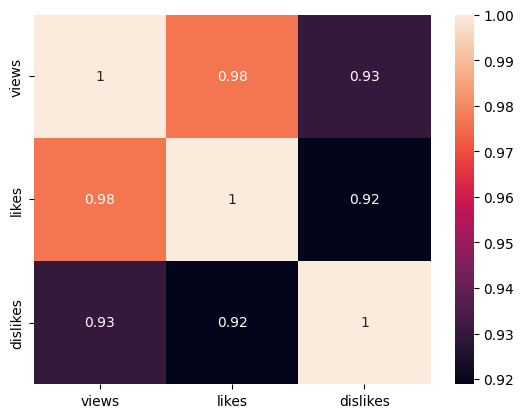

In [28]:
sns.heatmap(view_df[['views','likes','dislikes']].corr(),annot=True)
plt.show()

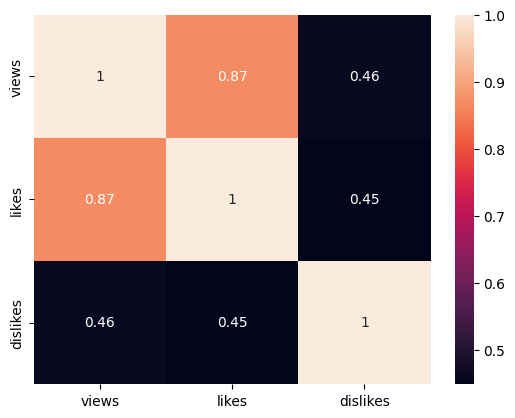

In [29]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot=True)
plt.show()

Q.which Channel have largest number of trendng videos.

In [35]:
channel_trending_df=full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
channel_trending_df.head(10)

channel_title   0
0  The Tonight Show Starring Jimmy Fallon  42
1                                     Vox  41
2                              jacksfilms  41
3    The Late Late Show with James Corden  40
4                          First We Feast  40
5                        Brave Wilderness  39
6                       Jimmy Kimmel Live  39
7                             Meet Arnold  35
8                        Marques Brownlee  34
9                           BBCRadio1VEVO  33

In [37]:
channel_trending_df=channel_trending_df.rename(columns={0:'Trending_Count'})
channel_trending_df.head()

channel_title  Trending_Count
0  The Tonight Show Starring Jimmy Fallon              42
1                                     Vox              41
2                              jacksfilms              41
3    The Late Late Show with James Corden              40
4                          First We Feast              40

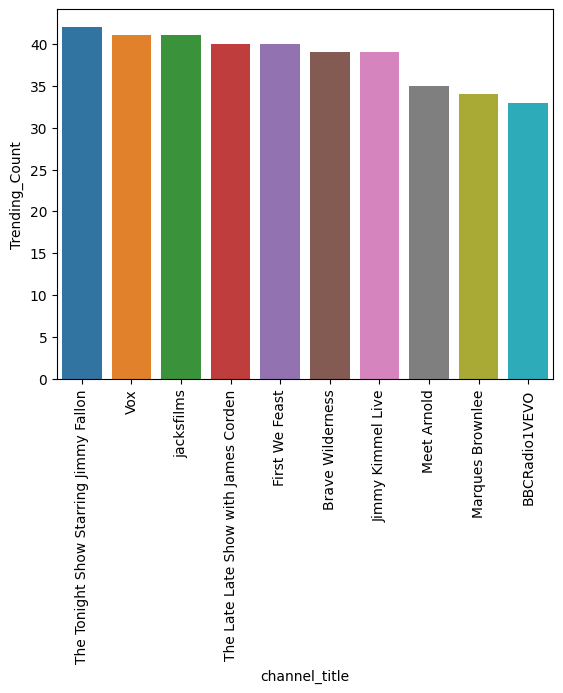

In [46]:
sns.barplot(x='channel_title',y='Trending_Count',data=channel_trending_df.head(10))
plt.xticks(rotation=90)
plt.show()

Q.Does punctuation count used in channel title affect the video views.

In [48]:
import string as st
st.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
# so we will make an function that will count the punctuation in channel title each time
def puncuation_count(text)->int:
    count=0
    for char in text:
        if char in st.punctuation:
            count=count+1
    return count

In [62]:
sample_df=full_df[0:100]
sample_df['punc_count']=sample_df['title'].apply(puncuation_count)
sample_df[['title','punc_count','views']].head()

C:\Users\Vikash Kumar\AppData\Local\Temp\ipykernel_10796\3075866050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['punc_count']=sample_df['title'].apply(puncuation_count)


title  punc_count    views
0  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...           3  4394029
1        iPhone X â Introducing iPhone X â Apple           0  7860119
2                                        My Response           0  5845909
3                          Apple iPhone X first look           0  2642103
4                                  iPhone X (parody)           2  1168130

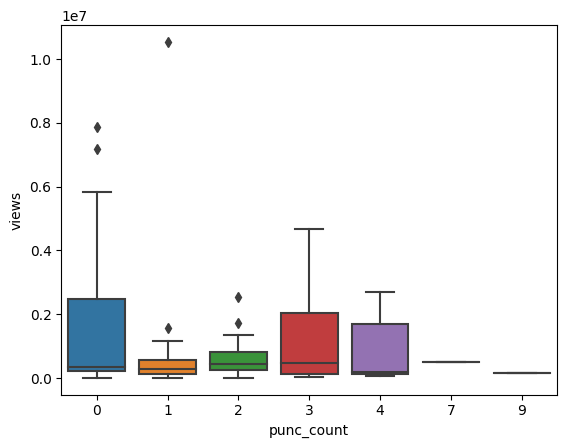

In [63]:
sns.boxplot(x='punc_count',y='views',data=sample_df)
plt.show()

Conclusion: Puncuation count either o or 3 affecting the view of channel.

# 2. Time Series data analysis.

Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time.

In time series analysis, analysts record data points at consistent intervals over a set period of time rather than just
recording the data points intermittently or randomly.

It also ensures that any trends or patterns discovered are not outliers and can account for seasonal variance. Additionally,
time series data can be used for forecasting--predicting future data based on historical data.

Task: Time series data analysis over S&P stocks over certain time series.

1.Data import

In [1]:
import glob as gb
'''
    The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell,
    although results are returned in arbitrary order.
'''
gb.glob(r"D:\Data_Set\individual_stocks_5yr/*csv")

['D:\\Data_Set\\individual_stocks_5yr\\AAPL_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\AAP_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\ABBV_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\AMAT_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\AMD_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\AME_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\AMGN_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\AMG_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\AMP_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\AMT_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\AMZN_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\DAL_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\D_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\EBAY_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\GILD_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\GIS_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\GLW_data.csv',
 'D:\\Data_Set\\individual_stocks_5yr\\GM_data.csv',
 'D:\\Data_Set\\individu

In [2]:
'''
making a company list and concat dataframe to analyze data over time series.
'''
company_path_list=[r'D:\\Data_Set\\individual_stocks_5yr\\AAPL_data.csv',
                    'D:\\Data_Set\\individual_stocks_5yr\\AMZN_data.csv',
                    'D:\\Data_Set\\individual_stocks_5yr\\GOOG_data.csv',
                    'D:\\Data_Set\\individual_stocks_5yr\\MSFT_data.csv'
                  ]
from warnings import filterwarnings
import pandas as pd
filterwarnings('ignore')
all_data=pd.DataFrame()
for file in company_path_list:
    current_df=pd.read_csv(file)
    all_data=pd.concat([all_data,current_df],axis=0)
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 297.0+ KB


NOTE: As we can see the data types for date column is object but to perform time series analysis it should be in data format.

In [4]:
all_data['date']=pd.to_datetime(all_data['date'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4752 non-null   datetime64[ns]
 1   open    4752 non-null   float64       
 2   high    4752 non-null   float64       
 3   low     4752 non-null   float64       
 4   close   4752 non-null   float64       
 5   volume  4752 non-null   int64         
 6   Name    4752 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 297.0+ KB


Q. Draw the subplots of different shares over closing price.

In [5]:
tech_list=all_data['Name'].unique()

In [6]:
tech_list

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

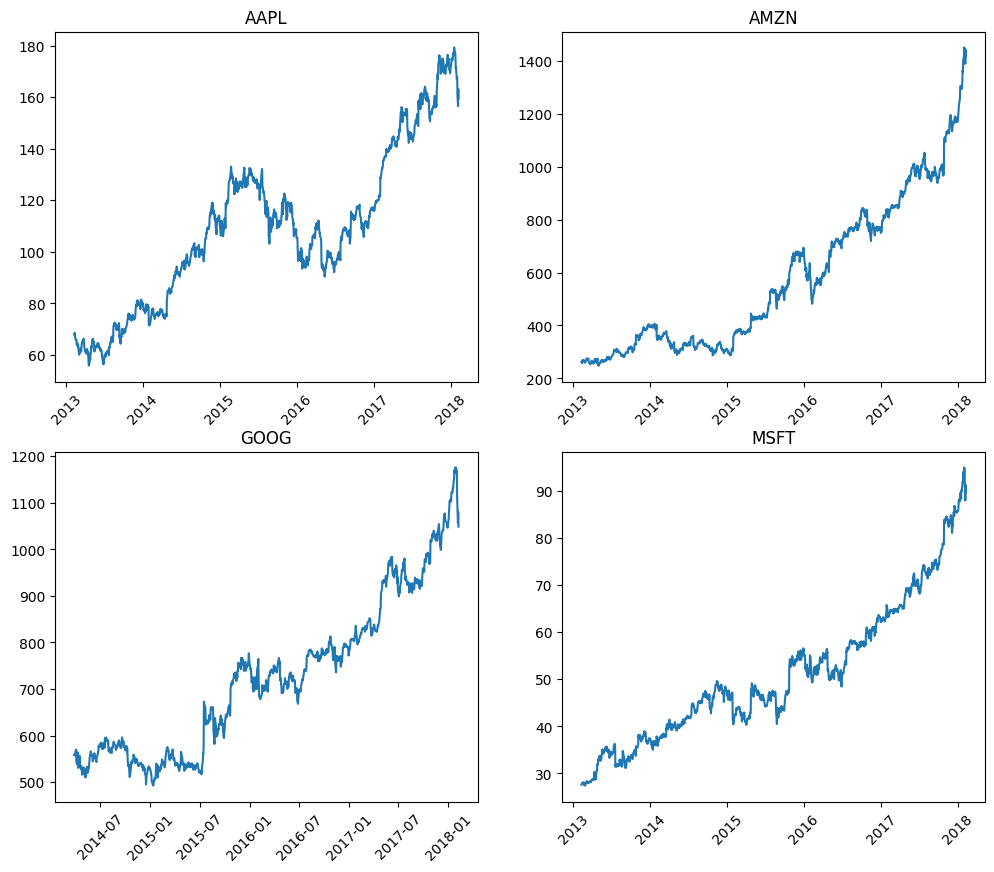

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    plot_df=all_data[all_data['Name']==company]
    plt.plot(plot_df['date'],plot_df['close'])
    plt.xticks(rotation=45)
    plt.title(company)

Q.Calculate moving average of different companies.

Also known as the rolling mean and is calculated by averaging data of the time series within k periods of time.

    Simple Moving Average (SMA):A simple moving average tells us the unweighted mean of the previous K data points.
                                The more the value of K the more smooth is the curve, but increasing K decreases accuracy.
                                
    Syntax: DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0).mean()

Parameters :

window : Size of the window. That is how many observations we have to take for the calculation of each window.

min_periods : Least number of observations in a window required to have a value (otherwise result is NA).

center : It is used to set the labels at the center of the window.

win_type : It is used to set the window type.

on : Datetime column of our dataframe on which we have to calculate rolling mean.

axis : integer or string, default 0

In [10]:
window_size=[10,20,30]
new_data=all_data.copy()
for window in window_size:
    new_data['SMA_close_'+str(window)]=new_data['close'].rolling(window).mean()
new_data.dropna(inplace=True)
new_data.head(10)

date     open     high      low    close     volume  Name  \
29 2013-03-22  64.9399  66.0142  64.7299  65.9871   98570591  AAPL   
30 2013-03-25  66.3842  67.1356  65.9685  66.2256  125073165  AAPL   
31 2013-03-26  66.4914  66.5485  65.7899  65.8765   73428208  AAPL   
32 2013-03-27  65.2085  65.2571  64.3899  64.5828   81854409  AAPL   
33 2013-03-28  64.2599  64.5455  63.0885  63.2371  110698007  AAPL   
34 2013-04-01  63.1285  63.3854  61.1057  61.2728   97294421  AAPL   
35 2013-04-02  61.0857  62.5914  60.9142  61.3988  132350022  AAPL   
36 2013-04-03  61.6242  62.4685  61.4728  61.7128   90719482  AAPL   
37 2013-04-04  61.9657  62.1428  60.7499  61.1028   89589332  AAPL   
38 2013-04-05  60.6428  60.7071  59.9542  60.4571   95743088  AAPL   

    SMA_close_10  SMA_close_20  SMA_close_30  
29      63.53908     62.822140     63.892263  
30      63.90636     62.970565     63.837977  
31      64.37359     63.057465     63.748480  
32      64.71259     63.111110     63.673147  
33      64.85773     63.120110     63.557197  
34      64.64702     63.108965     63.377770  
35      64.27662     63.178550     63.233160  
36      63.95519     63.184595     63.099827  
37      63.60719     63.199295     62.999207  
38      63.18534     63.146565     62.890350

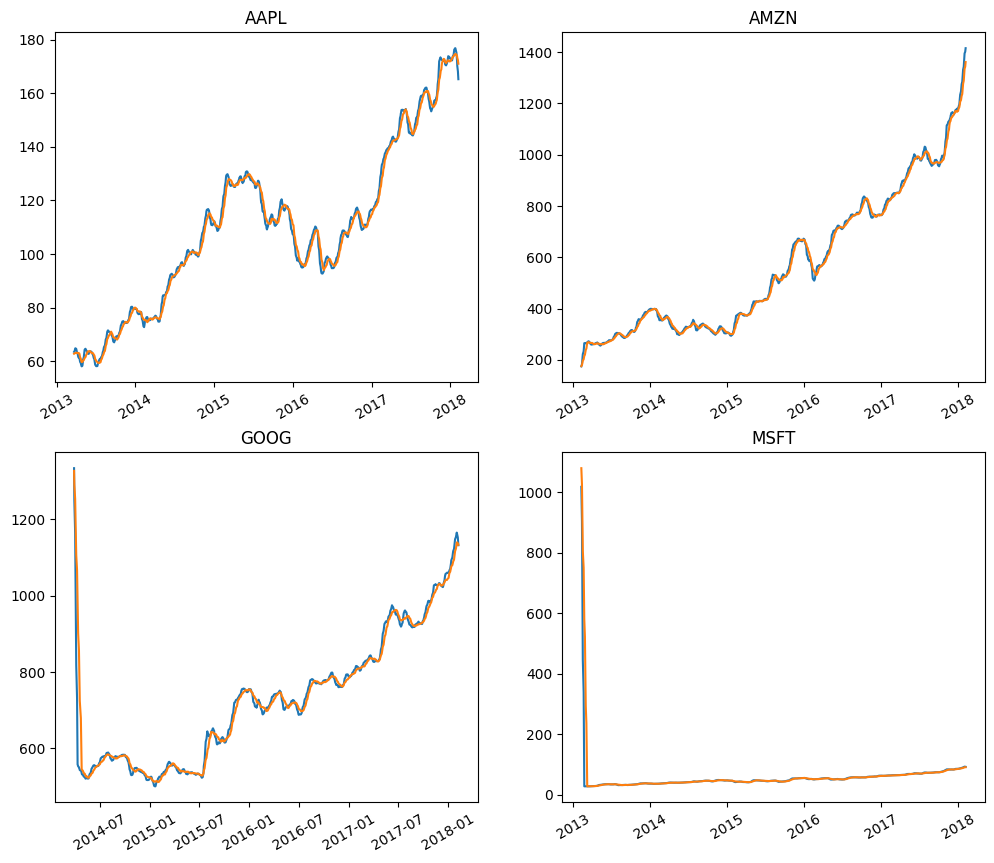

In [20]:
import matplotlib.pyplot as plt
new_data['close']=pd.to_datetime(new_data['close'])
plt.figure(figsize=(12,10))
for index,company in enumerate(['AAPL', 'AMZN', 'GOOG', 'MSFT'],1):
    plt.subplot(2,2,index)
    curr_df=new_data[new_data['Name']==company]
    plt.plot(curr_df['date'],curr_df[['SMA_close_10','SMA_close_20']])
    plt.title(company)
    plt.xticks(rotation=30)

Q. Observing close price with Apple Stock over daily return percentage.

In [2]:
import pandas as pd
apple_df=pd.read_csv(r'D:\\Data_Set\\individual_stocks_5yr\\AAPL_data.csv')
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [3]:
apple_df['date']=pd.to_datetime(apple_df['date'])
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   Name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


In [4]:
apple_df['Daily returns(in %)']=apple_df['close'].pct_change()*100
apple_df.dropna(inplace=True)
apple_df.head()

date     open     high      low    close     volume  Name  \
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   
5 2013-02-15  66.9785  67.1656  65.7028  65.7371   97924631  AAPL   

   Daily returns(in %)  
1             1.042235  
2            -2.506658  
3            -0.190297  
4            -0.089934  
5            -1.377979

In [5]:
import plotly.express as px
px.line(apple_df,x='date',y='Daily returns(in %)')

Q.What is resampling analysis? Perform this on close price of apple dataSet.

In [39]:
'''
Now we will plot chart with pandas so we need to convert date as index column.
'''
import pandas as pd
amazon_df=pd.read_csv(r'D:\\Data_Set\\individual_stocks_5yr\\AMZN_data.csv')
amazon_df['date']=pd.to_datetime(amazon_df['date'])
amazon_df.set_index(['date'],inplace=True)
amazon_df.head()

open    high      low   close   volume  Name
date                                                      
2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [40]:
amazon_df['close'].resample('Q').mean()

date
2013-03-31     265.032294
2013-06-30     266.400625
2013-09-30     298.085219
2013-12-31     359.616844
2014-03-31     371.143689
2014-06-30     316.389365
2014-09-30     332.636656
2014-12-31     311.590703
2015-03-31     351.658361
2015-06-30     418.003254
2015-09-30     505.616094
2015-12-31     630.406719
2016-03-31     567.619672
2016-06-30     676.453437
2016-09-30     765.451875
2016-12-31     783.699841
2017-03-31     833.496452
2017-06-30     954.157619
2017-09-30     982.359524
2017-12-31    1100.454603
2018-03-31    1329.184615
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

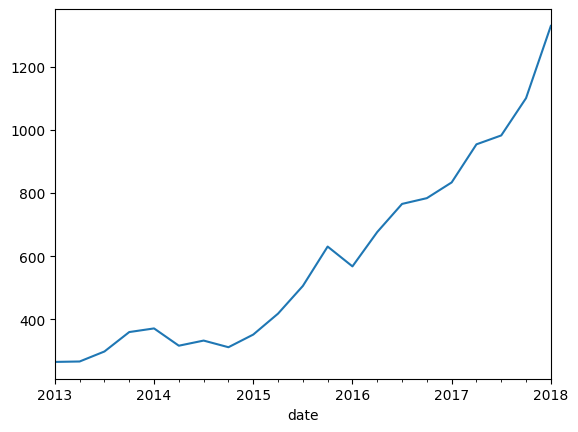

In [41]:
amazon_df['close'].resample('Q').mean().plot()

<Axes: xlabel='date'>

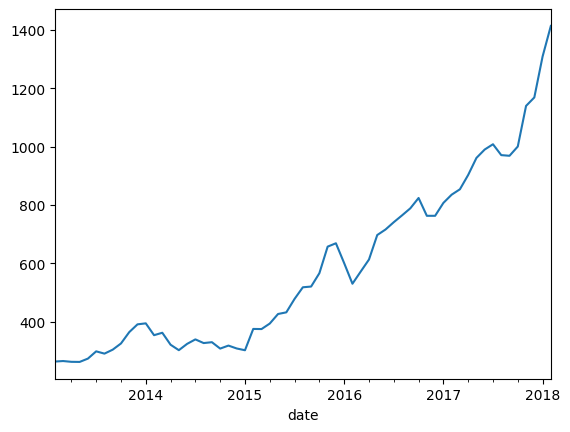

In [42]:
amazon_df['close'].resample('M').mean().plot()

Q.Check the closing price of IT stocks like amazon,microsoft,google and apple have some correlation or not.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
apple_stock=pd.read_csv(r'D:\\Data_Set\\individual_stocks_5yr\\AAPL_data.csv')
mfst_stock=pd.read_csv(r'D:\\Data_Set\\individual_stocks_5yr\\MSFT_data.csv')
amzn_stock=pd.read_csv(r'D:\\Data_Set\\individual_stocks_5yr\\AMZN_data.csv')
goog_stock=pd.read_csv(r'D:\\Data_Set\\individual_stocks_5yr\\GOOG_data.csv')

#Now we will make one dataframe in which the closing price will be stored.
closing_price_df=pd.DataFrame()
closing_price_df['APPL_CLOSE']=apple_stock['close']
closing_price_df['MFST_CLOSE']=mfst_stock['close']
closing_price_df['AMZN_CLOSE']=amzn_stock['close']
closing_price_df['GOOG_CLOSE']=goog_stock['close']

In [16]:
closing_price_df.head()

APPL_CLOSE  MFST_CLOSE  AMZN_CLOSE  GOOG_CLOSE
0     67.8542       27.55      261.95      558.46
1     68.5614       27.86      257.21      559.99
2     66.8428       27.88      258.70      556.97
3     66.7156       28.03      269.47      567.16
4     66.6556       28.04      269.24      567.00

In [17]:
#We will see the correlatin using .corr function but at first we will check the null value
closing_price_df.isnull().sum()

APPL_CLOSE      0
MFST_CLOSE      0
AMZN_CLOSE      0
GOOG_CLOSE    284
dtype: int64

As we can see there are 284 rows inside google dataset have missing values. so we will replace NAN values.

In [19]:
closing_price_df['GOOG_CLOSE'].unique

<bound method Series.unique of 0       558.46
1       559.99
2       556.97
3       567.16
4       567.00
         ...  
1254       NaN
1255       NaN
1256       NaN
1257       NaN
1258       NaN
Name: GOOG_CLOSE, Length: 1259, dtype: float64>

In [20]:
(284/1259)*100

22.55758538522637

As we can see there 22% data will be missing so as of now due unavailability of field experties we are just removing it.

In [21]:
closing_price_df['GOOG_CLOSE'].mean()

725.4033527179488

In [22]:
closing_price_df.dropna(inplace=True)
closing_price_df.shape

(975, 4)

Now Our dataframe is free from NAN/Missing values. Nw we will make the correlation map between the closing price.

In [24]:
closing_price_df['GOOG_CLOSE'].mean()

725.4033527179488

In [25]:
closing_price_df.isnull().sum()

APPL_CLOSE    0
MFST_CLOSE    0
AMZN_CLOSE    0
GOOG_CLOSE    0
dtype: int64

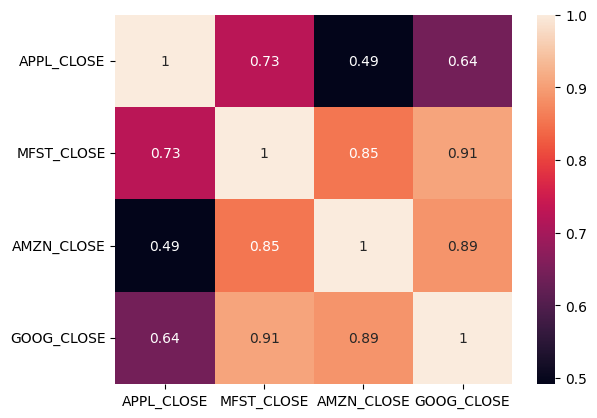

In [29]:
import seaborn as sns
sns.heatmap(closing_price_df.corr(),annot=True)
plt.show()

Conclusion:

    As we can see that from heatmap correlation google and microsoft have highest corelation i,e 0.9.
    
    It means if the price of microsoft will increase then with the same proportion google stock price wi also increase.

C:\Users\Vikash Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



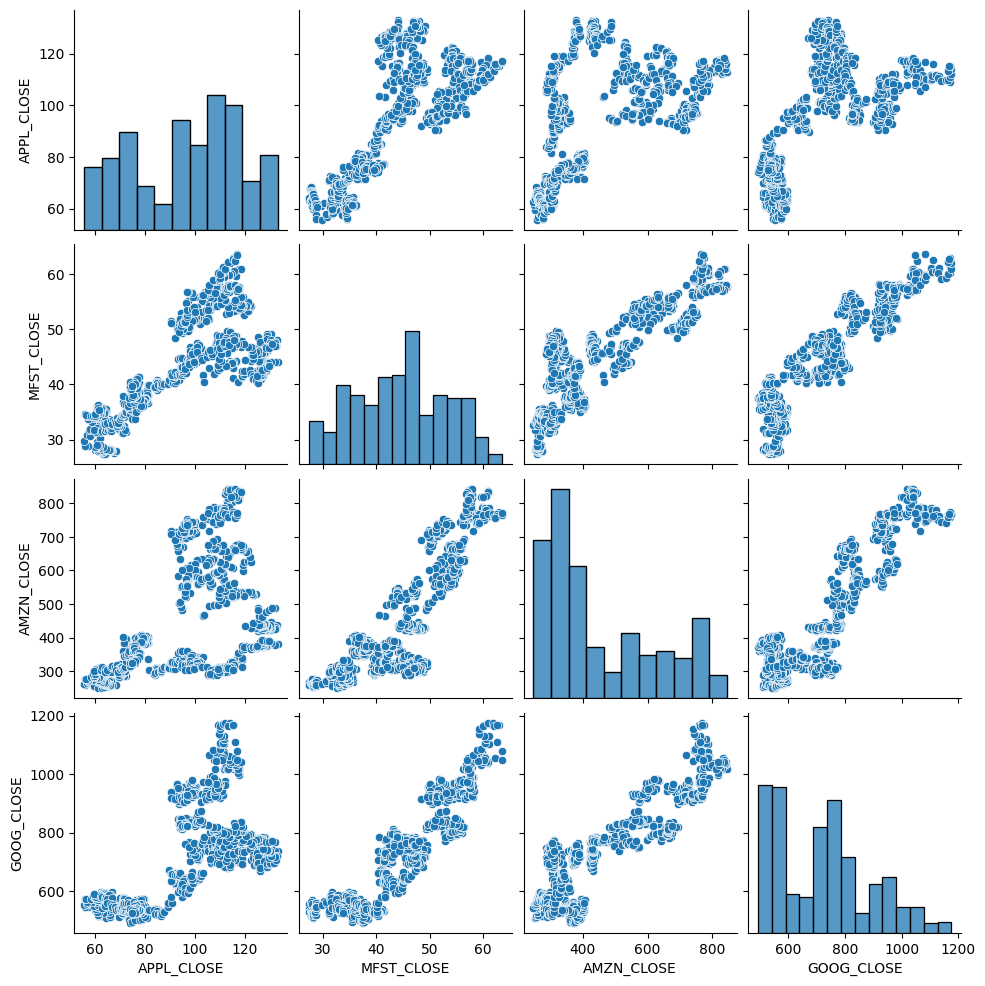

In [32]:
sns.pairplot(data=closing_price_df,kind='scatter')
plt.show()

NOTE: As we have small dataset so we made a pair-plot but try to avoid the pair plot when data set is large.

# Zomato Data Analysis

As our data is in format of database file so we need to import database connection. also data is in sqlite3 db so we will import sqlite3.

In [1]:
import pandas as pd
import sqlite3
#Making connection between database file
connection = sqlite3.connect(r"D:\Data_Set\Zomato\zomato_rawdata.sqlite")
#Need to pass sql statement and connection in read_sql_queries
sql_statement = "SELECT * FROM Users" 
user_df = pd.read_sql_query(sql_statement, connection)
user_df.head()

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   
4      4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [2]:
user_df.shape

(51717, 18)

In [3]:
(user_df.isnull().sum()/len(user_df))*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

NOTE:

    As we can see 54% data is missing in the case of dish_liked column so if we drop those row then it will affect
    the vizualization and model prediction so no need to drop without expeties in data field.

In [4]:
user_df['rate'].head()

0    4.1/5
1    4.1/5
2    3.8/5
3    3.7/5
4    3.8/5
Name: rate, dtype: object

In [5]:
user_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [6]:
#As we can see some redundent value like None,NEW so we need to replace it by NaN.
import numpy as np
user_df['rate'].replace(('NEW','-'),np.NaN,inplace=True)
user_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

As we can see rating is not in proper format so we need to perform some opertion to convert it in like 4.2 form 4.2/5

In [7]:
user_df['rate']=user_df['rate'].apply(lambda x: float(x.split("/")[0]) if type(x)==str else x)
user_df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [8]:
user_df.head(2)

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   

                                             address            name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...           Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  Spice Elephant   

  online_order book_table  rate  votes                           phone  \
0          Yes        Yes   4.1    775  080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                    080 41714161   

       location      rest_type  \
0  Banashankari  Casual Dining   
1  Banashankari  Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari

In [9]:
rating_df=user_df.groupby(['rate','name']).size().sort_values(ascending=False).reset_index()
rating_df=rating_df.rename(columns={0:'total_order_on'})
rating_df.head()

rate                 name  total_order_on
0   4.4               Onesta              51
1   4.2  Smally's Resto Cafe              35
2   4.2  Banjara Melting Pot              33
3   4.7             Hammered              30
4   4.5       Mainland China              29

In [10]:
rating_df[rating_df['name']=='Onesta']

rate    name  total_order_on
0      4.4  Onesta              51
98     4.3  Onesta              18
662    4.6  Onesta              11
2846   4.5  Onesta               5

In [11]:
rating_df[rating_df['name']=='Banjara Melting Pot']

rate                 name  total_order_on
2   4.2  Banjara Melting Pot              33

Conclusion: 

Above analysis show that the distinct types of rating received by restaurent and total frequencies of their particular rating.

Task: Analysing reltion between online orders and ratings.

In [12]:
x=pd.crosstab(user_df['rate'],user_df['online_order']).sort_values(by='rate',ascending=False)
x.head()

online_order   No  Yes
rate                  
4.9            12   43
4.8            34   32
4.7           113   54
4.6           140  160
4.5           297  359

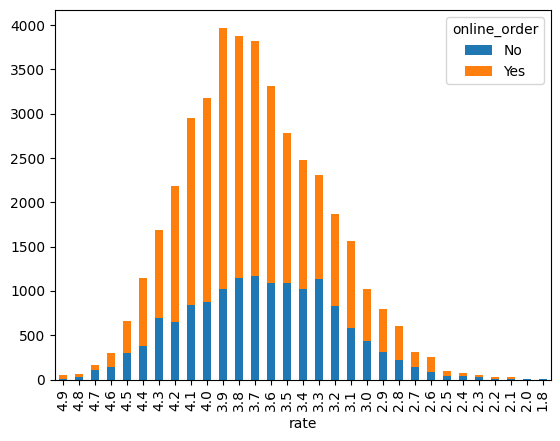

In [13]:
import matplotlib.pyplot as plt
x.plot(kind='bar',stacked=True)
plt.show()

Showing the stacked bar in total percentage in below code= ((yes/no)//(yes+no))*100.

In [14]:
percent_df=(x.div(x.sum(axis=0).astype(float)))*100
percent_df.head()

online_order        No       Yes
rate                            
4.9           0.082993  0.158053
4.8           0.235148  0.117621
4.7           0.781520  0.198486
4.6           0.968255  0.588106
4.5           2.054084  1.319562

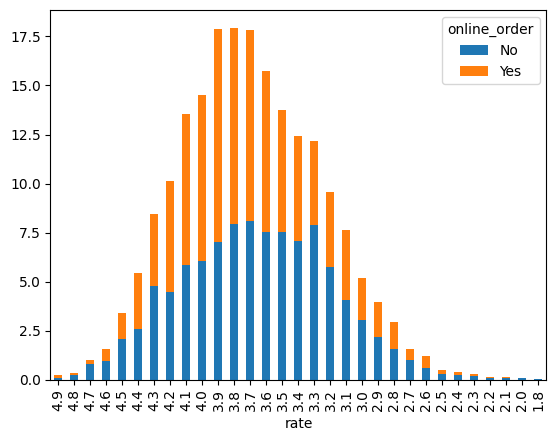

In [15]:
percent_df.plot(kind='bar',stacked=True)
plt.show()

Task: How to do text analysis? Perform text analysis.

# Task:
Identify the top most used keyword in review_list column of zomato dataset also make the visualization.

In [16]:
#checking if null is there or not for rest_type
user_df['rest_type'].isnull().sum()

227

In [17]:
#As there are total 227 rows have missing rest_type so it is not so relevant to analysis so we will drop it.
data=user_df.dropna(subset=['rest_type'])

In [18]:
data['rest_type'].isnull().sum()

0

In [19]:
#Lets first analyze some particular restaurent because data is huge.
# we will analyze the data of quick bites restaurent.
quick_bytes_df=data[data['rest_type'].str.contains('Quick Bites')]
quick_bytes_df.head()

index                                                url  \
3       3  https://www.zomato.com/bangalore/addhuri-udupi...   
23     23  https://www.zomato.com/bangalore/my-tea-house-...   
26     26  https://www.zomato.com/bangalore/coffee-tindi-...   
31     31  https://www.zomato.com/bangalore/foodiction-1-...   
34     34  https://www.zomato.com/bangalore/faasos-banash...   

                                              address                   name  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
23  224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...           My Tea House   
26  27th Cross Rd, Banashankari Stage II, Banashan...           Coffee Tindi   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...             Foodiction   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...                 Faasos   

   online_order book_table  rate  votes                           phone  \
3            No         No   3.7     88                  +91 9620009302   
23          Yes         No   3.6     62  080 65975430\r\n+91 7337733798   
26          Yes         No   3.8     75                  +91 9945758046   
31          Yes         No   2.8    506                  +91 9916107070   
34          Yes         No   4.2    415                  +91 7700020020   

        location          rest_type  \
3   Banashankari        Quick Bites   
23  Banashankari  Quick Bites, Cafe   
26  Banashankari  Cafe, Quick Bites   
31  Banashankari        Quick Bites   
34  Banashankari        Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
23                                    Pasta, Iced Tea   
26                                               None   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   

                                    cuisines approx_cost(for two people)  \
3                 South Indian, North Indian                         300   
23        Italian, Fast Food, Cafe, European                         600   
26                        Cafe, South Indian                         200   
31  North Indian, Fast Food, Chinese, Burger                         500   
34          North Indian, Biryani, Fast Food                         500   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
23  [('Rated 4.0', "RATED\n  So, went here with fr...   
26  [('Rated 5.0', 'RATED\n  please provide some e...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
23                                                 []           Cafes   
26                                                 []           Cafes   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   

   listed_in(city)  
3     Banashankari  
23    Banashankari  
26    Banashankari  
31    Banashankari  
34    Banashankari

In [20]:
quick_bytes_df['reviews_list'].head()

3     [('Rated 4.0', "RATED\n  Great food and proper...
23    [('Rated 4.0', "RATED\n  So, went here with fr...
26    [('Rated 5.0', 'RATED\n  please provide some e...
31    [('Rated 1.0', "RATED\n  Worst restaurant ever...
34    [('Rated 3.0', 'RATED\n  Not worth for the mon...
Name: reviews_list, dtype: object

In [21]:
#quick_bytes_df['reviews_list'][3]

In [22]:
quick_bytes_df['reviews_list'].apply(lambda each_word: each_word.lower())

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [23]:
from nltk.corpus import RegexpTokenizer
tokenizer = RegexpTokenizer('[a-zA-Z]+')
token_list = tokenizer.tokenize(quick_bytes_df['reviews_list'][3])
print(len(token_list))
token_list[:10]

2640


['Rated',
 'RATED',
 'n',
 'Great',
 'food',
 'and',
 'proper',
 'Karnataka',
 'style',
 'full']

In [24]:
sample_df = data[0:1000]
review_tokens = sample_df['reviews_list'].apply(tokenizer.tokenize)

In [25]:
review_tokens.head(2)

0    [Rated, RATED, n, A, beautiful, place, to, din...
1    [Rated, RATED, n, Had, been, here, for, dinner...
Name: reviews_list, dtype: object

In [26]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
words=stopwords.words('english')
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [27]:
words.extend(['rated','RATED','Rated','n','nan','x'])

In [28]:
rev3=review_tokens[3]
len(rev3)

2640

In [29]:
print(len([token for token in rev3 if token not in words]))

1460


In [30]:
# Now we will apply the same thing on all review_tokens
review_token_cleans = review_tokens.apply(lambda each_review : [token for token in each_review if token not in words])

In [31]:
review_token_cleans.head()

0    [A, beautiful, place, dine, The, interiors, ta...
1    [Had, dinner, family, Turned, good, choose, su...
2    [Ambience, good, enough, pocket, friendly, caf...
3    [Great, food, proper, Karnataka, style, full, ...
4    [Very, good, restaurant, neighbourhood, Buffet...
Name: reviews_list, dtype: object

In [32]:
type(review_token_cleans)

pandas.core.series.Series

In [33]:
total_reviews_2D = list(review_token_cleans)
#print(total_reviews_2D[:1])

In [34]:
from nltk import FreqDist
total_review_1D = []
#object creatin for freqDist
fd = FreqDist()
#Converting in 1D list to apply frequnecy distribution
for item in total_reviews_2D:
    for word in item:
        total_review_1D.append(word)

#Counting the frequncy of word
for word in total_review_1D:
    fd[word] = fd[word]+1
fd.most_common(10)

[('good', 10260),
 ('I', 9887),
 ('food', 9105),
 ('place', 8470),
 ('The', 5433),
 ('taste', 3692),
 ('chicken', 3044),
 ('service', 2756),
 ('ordered', 2530),
 ('try', 2514)]

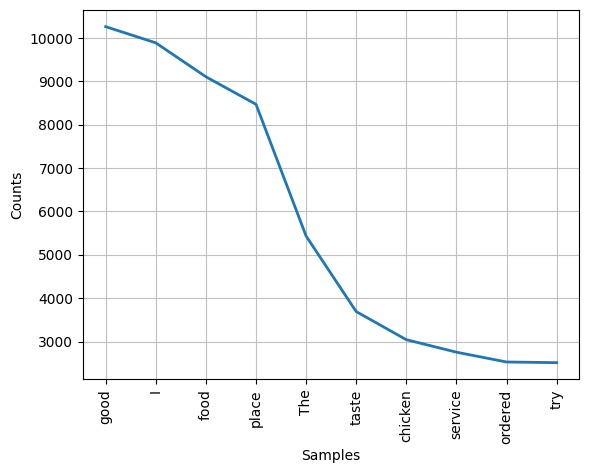

In [35]:
fd.plot(10)
plt.show()

In [36]:
from nltk import FreqDist,bigrams,trigrams
bi_grams = bigrams(total_review_1D)
bi_grams

<generator object bigrams at 0x0000016841F17BC0>

In [37]:
fd_bigrams = FreqDist()
for bigram in bi_grams:
    fd_bigrams[bigram] +=1
fd_bigrams.most_common(10)

[(('I', 'ordered'), 898),
 (('really', 'good'), 713),
 (('must', 'try'), 605),
 (('This', 'place'), 532),
 (('The', 'food'), 506),
 (('food', 'good'), 445),
 (('I', 'would'), 418),
 (('visit', 'place'), 408),
 (('fried', 'rice'), 403),
 (('good', 'food'), 403)]

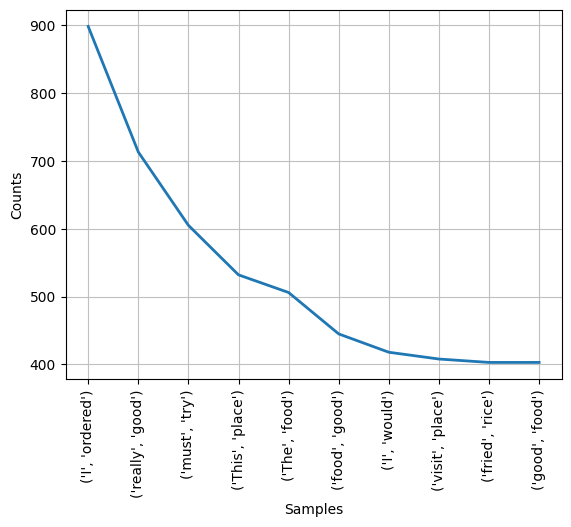

In [38]:
fd_bigrams.plot(10)
plt.show()

In [39]:
tri_grams = trigrams(total_review_1D)
tri_grams

<generator object trigrams at 0x0000016844211000>

In [40]:
fd_trigrams = FreqDist()
for trigram in tri_grams:
    fd_trigrams[trigram] +=1
fd_trigrams.most_common(10)

[(('paneer', 'tikka', 'biriyani'), 88),
 (('veg', 'non', 'veg'), 80),
 (('I', 'ordered', 'food'), 75),
 (('south', 'Indian', 'food'), 74),
 (('must', 'visit', 'place'), 72),
 (('I', 'would', 'recommend'), 63),
 (('The', 'food', 'good'), 63),
 (('paneer', 'butter', 'masala'), 62),
 (('Good', 'food', 'Good'), 60),
 (('I', 'ordered', 'chicken'), 60)]

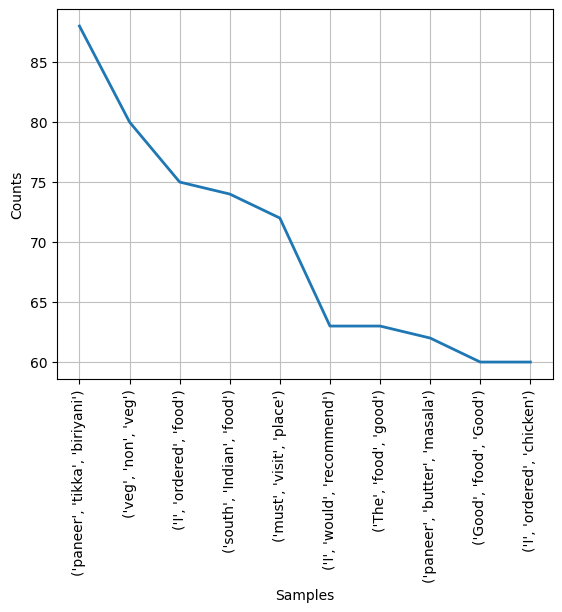

In [41]:
fd_trigrams.plot(10)
plt.show()

# Geographical Co-ordinate fom data

In [42]:
user_df[['address','location']].head(2)

address      location
0  942, 21st Main Road, 2nd Stage, Banashankari, ...  Banashankari
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  Banashankari

In [43]:
user_df['address'][0]

'942, 21st Main Road, 2nd Stage, Banashankari, Bangalore'

In [44]:
location_df = pd.DataFrame(user_df['location'].unique())
location_df.head()

0
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [45]:
location_df.shape

(94, 1)

In [46]:
location_df.rename(columns={0:'landmark'},inplace=True)
location_df.head(2)

landmark
0  Banashankari
1  Basavanagudi

In [47]:
location_df['full_landmark'] = location_df['landmark']+' ,Bengaluru'+' ,Karnataka'+' ,India'
location_df.head(2)

landmark                              full_landmark
0  Banashankari  Banashankari ,Bengaluru ,Karnataka ,India
1  Basavanagudi  Basavanagudi ,Bengaluru ,Karnataka ,India

In [48]:
location_df['landmark'].isnull().sum()

1

In [49]:
location_df.dropna(subset=['landmark'],inplace=True)
location_df['landmark'].isnull().sum()

0

In [50]:
#Now attaching the longitude and latitude into the co-ordinates
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="app",timeout=None) # making the connections to get geolocator
#taking two empty list to store longitude and lattitude
lat = []
lon = []
for location in location_df['landmark']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
        

In [51]:
location_df['longitude'] = lon
location_df['latitude'] = lat
location_df.head()

landmark                                    full_landmark  \
0        Banashankari        Banashankari ,Bengaluru ,Karnataka ,India   
1        Basavanagudi        Basavanagudi ,Bengaluru ,Karnataka ,India   
2         Mysore Road         Mysore Road ,Bengaluru ,Karnataka ,India   
3           Jayanagar           Jayanagar ,Bengaluru ,Karnataka ,India   
4  Kumaraswamy Layout  Kumaraswamy Layout ,Bengaluru ,Karnataka ,India   

   longitude   latitude  
0  75.704678  15.887678  
1  77.575502  12.941726  
2  77.530090  12.946662  
3  95.315941  27.349301  
4  77.555318  12.908149

# Spatial Analysis

In [52]:
location_df.isnull().sum()

landmark         0
full_landmark    0
longitude        1
latitude         1
dtype: int64

In [53]:
location_df[location_df['latitude'].isna()]

landmark                                 full_landmark  longitude  \
80  Rammurthy Nagar  Rammurthy Nagar ,Bengaluru ,Karnataka ,India        NaN   

    latitude  
80       NaN

In [54]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

#Setting the latitude and longitude for missing location
location_df['latitude'][80] = 13.0184435
location_df['longitude'][80] = 77.67812149999997

location_df['latitude'][86] = 12.971599
location_df['longitude'][86] = 77.594566


In [55]:
location_df.isnull().sum()

landmark         0
full_landmark    0
longitude        0
latitude         0
dtype: int64

In [56]:
user_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [57]:
user_df['cuisines'].head()

0    North Indian, Mughlai, Chinese
1       Chinese, North Indian, Thai
2            Cafe, Mexican, Italian
3        South Indian, North Indian
4          North Indian, Rajasthani
Name: cuisines, dtype: object

In [58]:
user_df['cuisines'].isnull().sum()

45

In [59]:
final_df = user_df.dropna(subset=['cuisines'])
final_df['cuisines'].isnull().sum()

0

In [60]:
north_indian_df = final_df[final_df['cuisines'].str.contains('North Indian')]
north_indian_df.head(2)

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   

                                             address            name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...           Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...  Spice Elephant   

  online_order book_table  rate  votes                           phone  \
0          Yes        Yes   4.1    775  080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                    080 41714161   

       location      rest_type  \
0  Banashankari  Casual Dining   
1  Banashankari  Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari

In [61]:
north_indian_df.shape

(21085, 18)

In [62]:
north_indian_df[['location','cuisines']].head()

location                        cuisines
0  Banashankari  North Indian, Mughlai, Chinese
1  Banashankari     Chinese, North Indian, Thai
3  Banashankari      South Indian, North Indian
4  Basavanagudi        North Indian, Rajasthani
5  Basavanagudi                    North Indian

In [63]:
X = north_indian_df['location'].value_counts()

In [64]:
X.head()

location
BTM             2469
HSR             1123
Whitefield      1059
Marathahalli    1038
JP Nagar         958
Name: count, dtype: int64

In [65]:
X = X.reset_index()

In [66]:
X.head()

location  count
0           BTM   2469
1           HSR   1123
2    Whitefield   1059
3  Marathahalli   1038
4      JP Nagar    958

In [67]:
X.rename(columns={'count':'Total_North_Indian_cuisines','location':'landmark'},inplace=True)
X.head()

landmark  Total_North_Indian_cuisines
0           BTM                         2469
1           HSR                         1123
2    Whitefield                         1059
3  Marathahalli                         1038
4      JP Nagar                          958

In [68]:
heatmap_df = X.merge(location_df,on = 'landmark',how = 'left')
heatmap_df.head()

landmark  Total_North_Indian_cuisines  \
0           BTM                         2469   
1           HSR                         1123   
2    Whitefield                         1059   
3  Marathahalli                         1038   
4      JP Nagar                          958   

                               full_landmark   longitude   latitude  
0           BTM ,Bengaluru ,Karnataka ,India -112.496595  45.954851  
1           HSR ,Bengaluru ,Karnataka ,India   75.724580  29.152347  
2    Whitefield ,Bengaluru ,Karnataka ,India   -2.296902  53.553368  
3  Marathahalli ,Bengaluru ,Karnataka ,India   77.698416  12.955257  
4      JP Nagar ,Bengaluru ,Karnataka ,India   76.646540  12.265594

In [69]:
import folium
basemap = folium.Map()
basemap

In [70]:
from folium.plugins import HeatMap
HeatMap(heatmap_df[['latitude','longitude','Total_North_Indian_cuisines']]).add_to(basemap)
basemap

# Perform Automation on your Task

In [110]:
def getHeatMap(cuisins):
    cuisine_df = final_df[final_df['cuisines'].str.contains(cuisins)]
    cuisines_rest_count = cuisine_df['location'].value_counts().reset_index()
    cuisines_rest_count = cuisines_rest_count.rename(columns={'count':'Total_North_Indian_cuisines','location':'landmark'})
    heatmap_df = cuisines_rest_count.merge(location_df,on = 'landmark',how = 'left')
    print(heatmap_df.head(4))
    basemap = folium.Map()
    HeatMap(heatmap_df[['longitude','latitude','Total_North_Indian_cuisines']]).add_to(basemap)
    return basemap

In [111]:
#Calling the function
getHeatMap('South Indian')

    landmark  Total_North_Indian_cuisines  \
0        BTM                          815   
1   JP Nagar                          437   
2        HSR                          436   
3  Jayanagar                          416   

                            full_landmark   longitude   latitude  
0        BTM ,Bengaluru ,Karnataka ,India -112.496595  45.954851  
1   JP Nagar ,Bengaluru ,Karnataka ,India   76.646540  12.265594  
2        HSR ,Bengaluru ,Karnataka ,India   75.724580  29.152347  
3  Jayanagar ,Bengaluru ,Karnataka ,India   95.315941  27.349301  


# Sales data Analysis

In [1]:
import pandas as pd
all_data = pd.read_feather(r"D:\Data_Set\sales\Sales_data.ftr")
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1     None                        None             None       None   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1            None                                  None  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

In [2]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [3]:
all_data.shape

(186850, 6)

In [4]:
#Above code shows that total 545 records are null
all_data.dropna(how='all',inplace=True)
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [5]:
#NAN values has been dropped now we will check about duplicate values.
all_data[all_data.duplicated()].head()

Order ID                     Product  Quantity Ordered  Price Each  \
31      176585  Bose SoundSport Headphones                 1       99.99   
1149  Order ID                     Product  Quantity Ordered  Price Each   
1155  Order ID                     Product  Quantity Ordered  Price Each   
1302    177795    Apple Airpods Headphones                 1         150   
1684    178158        USB-C Charging Cable                 1       11.95   

          Order Date                        Purchase Address  
31    04/07/19 11:31       823 Highland St, Boston, MA 02215  
1149      Order Date                        Purchase Address  
1155      Order Date                        Purchase Address  
1302  04/27/19 19:45          740 14th St, Seattle, WA 98101  
1684  04/28/19 21:13  197 Center St, San Francisco, CA 94016

In [6]:
all_data.drop_duplicates(inplace=True)
all_data[all_data.duplicated()].head()

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address]
Index: []

In [7]:
all_data.shape

(185687, 6)

In [8]:
all_data[all_data['Order ID'].str.contains('Order ID')]

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
519  Order ID  Product  Quantity Ordered  Price Each  Order Date   

     Purchase Address  
519  Purchase Address

In [9]:
all_data[all_data['Product'].str.contains('Product')]

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
519  Order ID  Product  Quantity Ordered  Price Each  Order Date   

     Purchase Address  
519  Purchase Address

In [10]:
#getting the index where data is like this for droping that particular row.
# if rows like it is more then we can use for loop and list for indexes to store each index and then we can dop it.
i=all_data[all_data['Order ID'].str.contains('Order ID')].index
print(i)

Index([519], dtype='int64')


In [11]:
all_data.drop(i,inplace=True)
all_data[all_data['Order ID'].str.contains('Order ID')]

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address]
Index: []

In [12]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [13]:
# we will use concept of dictionary to conver the data type in specific format.
convert_dict = {'Order ID':int,
                'Quantity Ordered':int,
                'Price Each':float}
all_data=all_data.astype(convert_dict)
all_data['Order Date'] = all_data['Order Date'].apply(pd.to_datetime, format = "mixed")
all_data.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [24]:
all_data.head(2)

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
2    176559  Bose SoundSport Headphones                 1       99.99   

           Order Date                   Purchase Address  Total_Order_amount  
0 2019-04-19 08:46:00       917 1st St, Dallas, TX 75001               23.90  
2 2019-04-07 22:30:00  682 Chestnut St, Boston, MA 02215               99.99

In [25]:
#Checking is there any column related to order date has null value or not
all_data['Order Date'].isnull().sum()

0

In [26]:
all_data['Order Date'][0].split('-')

AttributeError: 'Timestamp' object has no attribute 'split'

In [27]:
#Getting error in above code as it is datatime format and split() only applies on string object
all_data['Order Date'] = all_data['Order Date'].astype(str)
all_data.dtypes

Order ID                int32
Product                object
Quantity Ordered        int32
Price Each            float64
Order Date             object
Purchase Address       object
Total_Order_amount    float64
dtype: object

In [28]:
all_data['Order Date'][0].split('-')[1]

'04'

In [29]:
def month_number(order_date):
    return order_date.split('-')[1]

In [30]:
all_data['Month_number'] = all_data['Order Date'].apply(month_number)
all_data.tail()

Order ID                 Product  Quantity Ordered  Price Each  \
186845    259353  AAA Batteries (4-pack)                 3        2.99   
186846    259354                  iPhone                 1      700.00   
186847    259355                  iPhone                 1      700.00   
186848    259356  34in Ultrawide Monitor                 1      379.99   
186849    259357    USB-C Charging Cable                 1       11.95   

                 Order Date                         Purchase Address  \
186845  2019-09-17 20:56:00   840 Highland St, Los Angeles, CA 90001   
186846  2019-09-01 16:00:00  216 Dogwood St, San Francisco, CA 94016   
186847  2019-09-23 07:39:00     220 12th St, San Francisco, CA 94016   
186848  2019-09-19 17:30:00   511 Forest St, San Francisco, CA 94016   
186849  2019-09-30 00:18:00   250 Meadow St, San Francisco, CA 94016   

        Total_Order_amount Month_number  
186845                8.97           09  
186846              700.00           09  
186847              700.00           09  
186848              379.99           09  
186849               11.95           09

In [31]:
all_data['Month_number'] = all_data['Month_number'].apply(pd.to_numeric)
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
2    176559  Bose SoundSport Headphones                 1       99.99   
3    176560                Google Phone                 1      600.00   
4    176560            Wired Headphones                 1       11.99   
5    176561            Wired Headphones                 1       11.99   

            Order Date                      Purchase Address  \
0  2019-04-19 08:46:00          917 1st St, Dallas, TX 75001   
2  2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215   
3  2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001   
4  2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001   
5  2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001   

   Total_Order_amount  Month_number  
0               23.90             4  
2               99.99             4  
3              600.00             4  
4               11.99             4  
5               11.99             4

In [32]:
all_data['Total_Order_amount'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
2    176559  Bose SoundSport Headphones                 1       99.99   
3    176560                Google Phone                 1      600.00   
4    176560            Wired Headphones                 1       11.99   
5    176561            Wired Headphones                 1       11.99   

            Order Date                      Purchase Address  \
0  2019-04-19 08:46:00          917 1st St, Dallas, TX 75001   
2  2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215   
3  2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001   
4  2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001   
5  2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001   

   Total_Order_amount  Month_number  
0               23.90             4  
2               99.99             4  
3              600.00             4  
4               11.99             4  
5               11.99             4

In [33]:
Monthly_sales_df=all_data.groupby(['Month_number'])['Total_Order_amount'].sum()

In [34]:
Monthly_sales_df

Month_number
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: Total_Order_amount, dtype: float64

In [35]:
Monthly_sales_df = Monthly_sales_df.reset_index()

In [36]:
Monthly_sales_df.head()

Month_number  Total_Order_amount
0             1          1821413.16
1             2          2200078.08
2             3          2804973.35
3             4          3389217.98
4             5          3150616.23

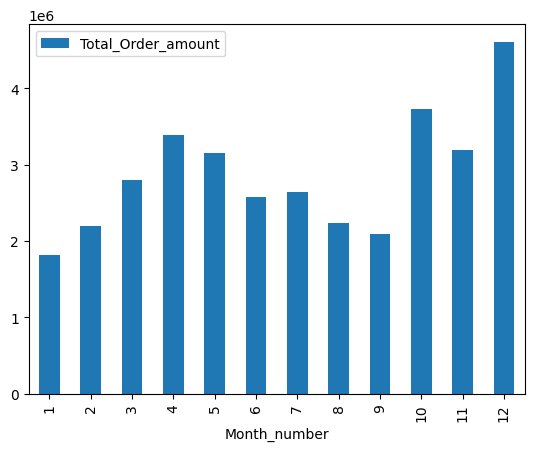

In [37]:
import matplotlib.pyplot as plt
Monthly_sales_df.plot(x='Month_number',y='Total_Order_amount',kind='bar')
plt.show()

In [38]:
all_data.head(1)

Order ID               Product  Quantity Ordered  Price Each  \
0    176558  USB-C Charging Cable                 2       11.95   

            Order Date              Purchase Address  Total_Order_amount  \
0  2019-04-19 08:46:00  917 1st St, Dallas, TX 75001                23.9   

   Month_number  
0             4

In [39]:
x=all_data['Purchase Address'][0].split(',')[1]
x

' Dallas'

In [40]:
x=x.strip()
x

'Dallas'

In [41]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x:x.split(',')[1].strip())
all_data.head(2)

Order ID                     Product  Quantity Ordered  Price Each  \
0    176558        USB-C Charging Cable                 2       11.95   
2    176559  Bose SoundSport Headphones                 1       99.99   

            Order Date                   Purchase Address  Total_Order_amount  \
0  2019-04-19 08:46:00       917 1st St, Dallas, TX 75001               23.90   
2  2019-04-07 22:30:00  682 Chestnut St, Boston, MA 02215               99.99   

   Month_number    City  
0             4  Dallas  
2             4  Boston

In [42]:
max_order_city_df = all_data.groupby(['City'])['Quantity Ordered'].sum()
max_order_city_df = max_order_city_df.reset_index()
max_order_city_df

City  Quantity Ordered
0        Atlanta             16584
1         Austin             11137
2         Boston             22494
3         Dallas             16707
4    Los Angeles             33247
5  New York City             27903
6       Portland             14037
7  San Francisco             50169
8        Seattle             16534

In [43]:
max_order_city_df = max_order_city_df.sort_values(by=['Quantity Ordered'],ascending=False)
max_order_city_df

City  Quantity Ordered
7  San Francisco             50169
4    Los Angeles             33247
5  New York City             27903
2         Boston             22494
3         Dallas             16707
0        Atlanta             16584
8        Seattle             16534
6       Portland             14037
1         Austin             11137

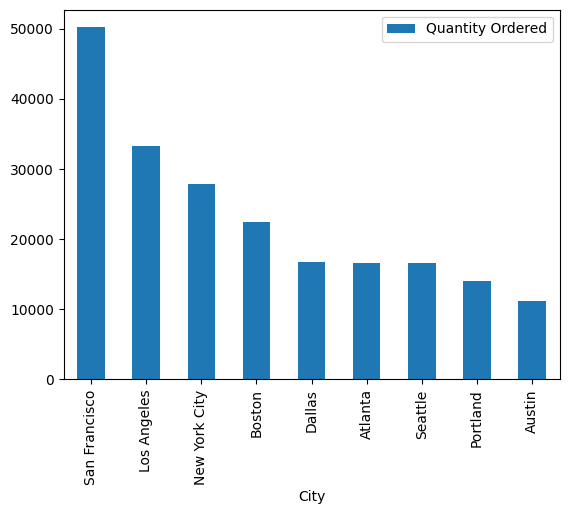

In [44]:
max_order_city_df.plot(x='City',y='Quantity Ordered',kind='bar')
plt.show()

In [45]:
all_data[all_data['Product']=='USB-C Charging Cable']['Price Each'].unique()

array([11.95])

In [46]:
all_data[all_data['Product']=='20in Monitor']['Price Each'].unique()

array([109.99])

In [47]:
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum','Price Each':'mean'})
count_df = count_df.reset_index()
count_df

Product  Quantity Ordered  Price Each
0                 20in Monitor              4126      109.99
1       27in 4K Gaming Monitor              6239      389.99
2             27in FHD Monitor              7541      149.99
3       34in Ultrawide Monitor              6192      379.99
4        AA Batteries (4-pack)             27615        3.84
5       AAA Batteries (4-pack)             30986        2.99
6     Apple Airpods Headphones             15637      150.00
7   Bose SoundSport Headphones             13430       99.99
8                Flatscreen TV              4813      300.00
9                 Google Phone              5529      600.00
10                    LG Dryer               646      600.00
11          LG Washing Machine               666      600.00
12    Lightning Charging Cable             23169       14.95
13          Macbook Pro Laptop              4725     1700.00
14             ThinkPad Laptop              4128      999.99
15        USB-C Charging Cable             23931       11.95
16             Vareebadd Phone              2068      400.00
17            Wired Headphones             20524       11.99
18                      iPhone              6847      700.00

In [48]:
product_names = count_df['Product'].values
product_names

array(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'], dtype=object)

C:\Users\Vikash Kumar\AppData\Local\Temp\ipykernel_1380\2090642168.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list(product_names.flatten()),rotation='vertical',fontsize=8)


Text(0, 0.5, 'Count of product')

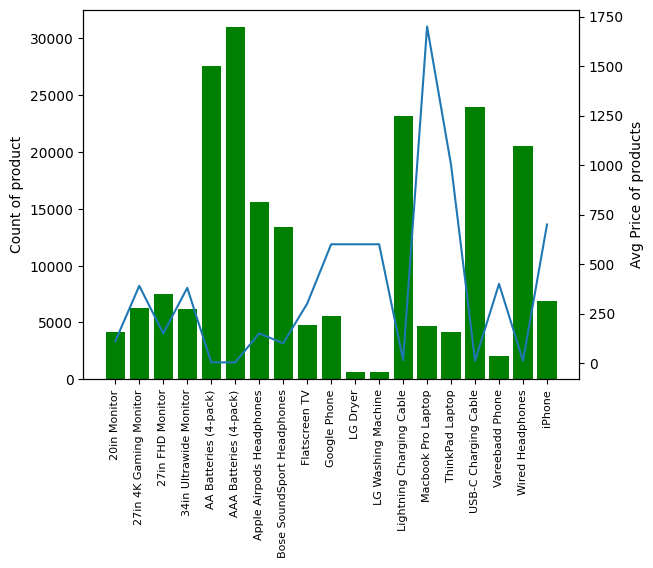

In [49]:
import matplotlib.pyplot as plt
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(count_df['Product'],count_df['Quantity Ordered'],color='g')
ax2.plot(count_df['Product'],count_df['Price Each'])
ax1.set_xticklabels(list(product_names.flatten()),rotation='vertical',fontsize=8)
ax2.set_ylabel('Avg Price of products')
ax1.set_ylabel('Count of product')

Q.Understanding trend of most sold product.

In [50]:
Top_most_five_df=all_data['Product'].value_counts()[0:3]
Top_most_five_df=Top_most_five_df.reset_index()
Top_most_five_df

Product  count
0      USB-C Charging Cable  21859
1  Lightning Charging Cable  21610
2    AAA Batteries (4-pack)  20612

In [51]:
most_sold_df=all_data[all_data['Product'].isin(Top_most_five_df['Product'])]
most_sold_df.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0     176558      USB-C Charging Cable                 2       11.95   
6     176562      USB-C Charging Cable                 1       11.95   
8     176564      USB-C Charging Cable                 1       11.95   
12    176568  Lightning Charging Cable                 1       14.95   
15    176571  Lightning Charging Cable                 1       14.95   

             Order Date                        Purchase Address  \
0   2019-04-19 08:46:00            917 1st St, Dallas, TX 75001   
6   2019-04-29 13:03:00  381 Wilson St, San Francisco, CA 94016   
8   2019-04-12 10:58:00         790 Ridge St, Atlanta, GA 30301   
12  2019-04-15 12:18:00           438 Elm St, Seattle, WA 98101   
15  2019-04-19 14:29:00       253 Johnson St, Atlanta, GA 30301   

    Total_Order_amount  Month_number           City  
0                23.90             4         Dallas  
6                11.95             4  San Francisco  
8                11.95             4        Atlanta  
12               14.95             4        Seattle  
15               14.95             4        Atlanta

In [52]:
y = most_sold_df.groupby(['Product','Month_number'])['Quantity Ordered'].sum()
y = y.unstack()
y

Month_number                1     2     3     4     5     6     7     8   \
Product                                                                    
AAA Batteries (4-pack)    1600  1971  2477  2936  2923  2161  2361  2019   
Lightning Charging Cable  1153  1497  1869  2367  2074  1683  1806  1440   
USB-C Charging Cable      1284  1651  1940  2265  2064  1672  1848  1457   

Month_number                9     10    11    12  
Product                                           
AAA Batteries (4-pack)    1922  3357  3021  4238  
Lightning Charging Cable  1428  2564  2207  3081  
USB-C Charging Cable      1591  2662  2248  3249

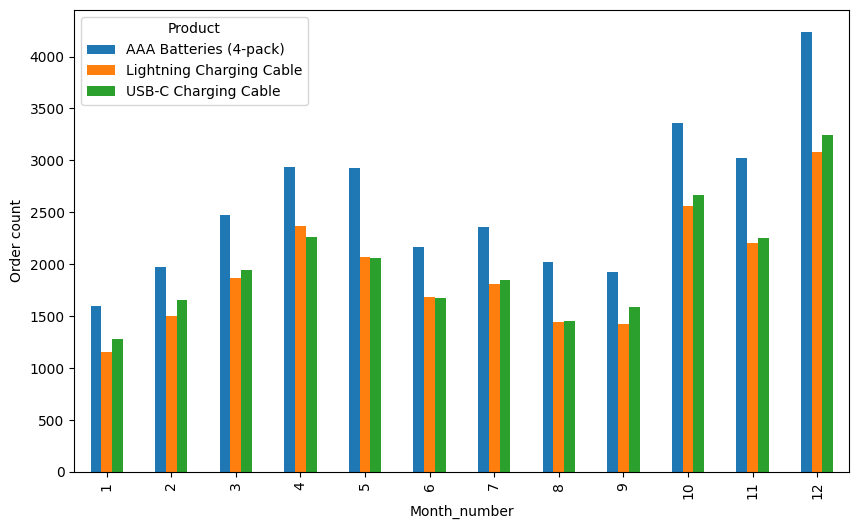

In [53]:
ax = y.T.plot(kind='bar',ylabel='Order count',figsize=(10,6))
plt.show()

In [54]:
#NOTE: In above plot we have used ".T" which means we are transposing the Pivot table to plot the visualize so that month number
#can be considered on X axis to clearly visualize the plotting.
y.T.head()

Product       AAA Batteries (4-pack)  Lightning Charging Cable  \
Month_number                                                     
1                               1600                      1153   
2                               1971                      1497   
3                               2477                      1869   
4                               2936                      2367   
5                               2923                      2074   

Product       USB-C Charging Cable  
Month_number                        
1                             1284  
2                             1651  
3                             1940  
4                             2265  
5                             2064

Q. Analysing that what are the products often sold together??

In [55]:
#Lets see that do we have duplicated order ID or NOT so that we cn group by orders to see together sold produts.
all_data[all_data['Order ID'].duplicated()].shape

(7249, 9)

In [56]:
df_duplicated_order = all_data[all_data['Order ID'].duplicated(keep=False)]
df_duplicated_order.head(10)

Order ID                   Product  Quantity Ordered  Price Each  \
3      176560              Google Phone                 1      600.00   
4      176560          Wired Headphones                 1       11.99   
18     176574              Google Phone                 1      600.00   
19     176574      USB-C Charging Cable                 1       11.95   
32     176586    AAA Batteries (4-pack)                 2        2.99   
33     176586              Google Phone                 1      600.00   
119    176672  Lightning Charging Cable                 1       14.95   
120    176672      USB-C Charging Cable                 1       11.95   
129    176681  Apple Airpods Headphones                 1      150.00   
130    176681           ThinkPad Laptop                 1      999.99   

              Order Date                        Purchase Address  \
3    2019-04-12 14:38:00    669 Spruce St, Los Angeles, CA 90001   
4    2019-04-12 14:38:00    669 Spruce St, Los Angeles, CA 90001   
18   2019-04-03 19:42:00       20 Hill St, Los Angeles, CA 90001   
19   2019-04-03 19:42:00       20 Hill St, Los Angeles, CA 90001   
32   2019-04-10 17:00:00  365 Center St, San Francisco, CA 94016   
33   2019-04-10 17:00:00  365 Center St, San Francisco, CA 94016   
119  2019-04-12 11:07:00   778 Maple St, New York City, NY 10001   
120  2019-04-12 11:07:00   778 Maple St, New York City, NY 10001   
129  2019-04-20 10:39:00        331 Cherry St, Seattle, WA 98101   
130  2019-04-20 10:39:00        331 Cherry St, Seattle, WA 98101   

     Total_Order_amount  Month_number           City  
3                600.00             4    Los Angeles  
4                 11.99             4    Los Angeles  
18               600.00             4    Los Angeles  
19                11.95             4    Los Angeles  
32                 5.98             4  San Francisco  
33               600.00             4  San Francisco  
119               14.95             4  New York City  
120               11.95             4  New York City  
129              150.00             4        Seattle  
130              999.99             4        Seattle

In [57]:
duplicate_product = df_duplicated_order.groupby(['Order ID'])['Product'].apply(lambda x : ', '.join(x))
duplicate_product = duplicate_product.reset_index()
duplicate_product.rename(columns={'Product':'Item_Sold_Together'},inplace=True)
duplicate_product.head()

Order ID                               Item_Sold_Together
0    141275           USB-C Charging Cable, Wired Headphones
1    141290  Apple Airpods Headphones, AA Batteries (4-pack)
2    141365                Vareebadd Phone, Wired Headphones
3    141384               Google Phone, USB-C Charging Cable
4    141450         Google Phone, Bose SoundSport Headphones

In [58]:
final_duplicate_item_df = df_duplicated_order.merge(duplicate_product,on='Order ID',how='left')
final_duplicate_item_df.head()

Order ID                 Product  Quantity Ordered  Price Each  \
0    176560            Google Phone                 1      600.00   
1    176560        Wired Headphones                 1       11.99   
2    176574            Google Phone                 1      600.00   
3    176574    USB-C Charging Cable                 1       11.95   
4    176586  AAA Batteries (4-pack)                 2        2.99   

            Order Date                        Purchase Address  \
0  2019-04-12 14:38:00    669 Spruce St, Los Angeles, CA 90001   
1  2019-04-12 14:38:00    669 Spruce St, Los Angeles, CA 90001   
2  2019-04-03 19:42:00       20 Hill St, Los Angeles, CA 90001   
3  2019-04-03 19:42:00       20 Hill St, Los Angeles, CA 90001   
4  2019-04-10 17:00:00  365 Center St, San Francisco, CA 94016   

   Total_Order_amount  Month_number           City  \
0              600.00             4    Los Angeles   
1               11.99             4    Los Angeles   
2              600.00             4    Los Angeles   
3               11.95             4    Los Angeles   
4                5.98             4  San Francisco   

                     Item_Sold_Together  
0        Google Phone, Wired Headphones  
1        Google Phone, Wired Headphones  
2    Google Phone, USB-C Charging Cable  
3    Google Phone, USB-C Charging Cable  
4  AAA Batteries (4-pack), Google Phone

In [59]:
no_duplicate_df = final_duplicate_item_df.drop_duplicates(subset=['Order ID'])
no_duplicate_df.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0    176560              Google Phone                 1      600.00   
2    176574              Google Phone                 1      600.00   
4    176586    AAA Batteries (4-pack)                 2        2.99   
6    176672  Lightning Charging Cable                 1       14.95   
8    176681  Apple Airpods Headphones                 1      150.00   

            Order Date                        Purchase Address  \
0  2019-04-12 14:38:00    669 Spruce St, Los Angeles, CA 90001   
2  2019-04-03 19:42:00       20 Hill St, Los Angeles, CA 90001   
4  2019-04-10 17:00:00  365 Center St, San Francisco, CA 94016   
6  2019-04-12 11:07:00   778 Maple St, New York City, NY 10001   
8  2019-04-20 10:39:00        331 Cherry St, Seattle, WA 98101   

   Total_Order_amount  Month_number           City  \
0              600.00             4    Los Angeles   
2              600.00             4    Los Angeles   
4                5.98             4  San Francisco   
6               14.95             4  New York City   
8              150.00             4        Seattle   

                               Item_Sold_Together  
0                  Google Phone, Wired Headphones  
2              Google Phone, USB-C Charging Cable  
4            AAA Batteries (4-pack), Google Phone  
6  Lightning Charging Cable, USB-C Charging Cable  
8       Apple Airpods Headphones, ThinkPad Laptop

In [60]:
X = no_duplicate_df[no_duplicate_df['Item_Sold_Together'].duplicated()]['Item_Sold_Together'].value_counts()
X.head()

Item_Sold_Together
iPhone, Lightning Charging Cable         885
Google Phone, USB-C Charging Cable       856
iPhone, Wired Headphones                 360
Vareebadd Phone, USB-C Charging Cable    311
Google Phone, Wired Headphones           302
Name: count, dtype: int64

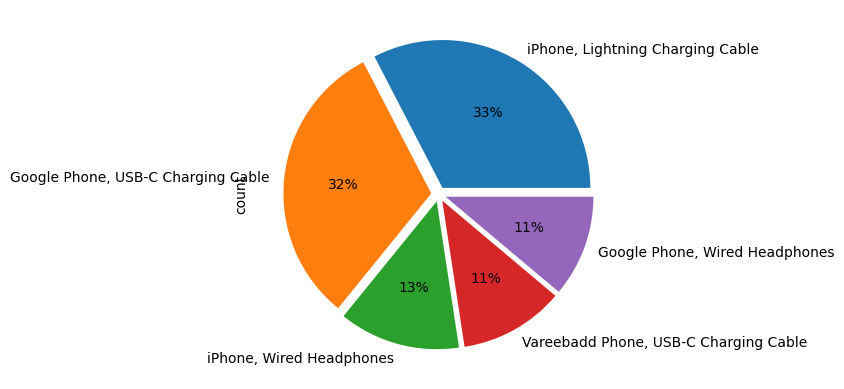

In [61]:
top_5_sold_together_df = X.head()
explode_gap = (0.05, 0.05, 0.05, 0.05, 0.05)
top_5_sold_together_df.plot(kind='pie',autopct='%1.0f%%',explode=explode_gap)
plt.show()

# IPL Dataset Analysis

In [1]:
import pandas as pd
import numpy as np
delivery_df = pd.read_csv(r"D:\Data_Set\IPL\deliveries.csv")
delivery_df.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [2]:
match_df = pd.read_csv(r"D:\Data_Set\IPL\matches.csv")
match_df.head()

id  season       city      date                        team1  \
0   1    2017  Hyderabad  4/5/2017          Sunrisers Hyderabad   
1   2    2017       Pune  4/6/2017               Mumbai Indians   
2   3    2017     Rajkot  4/7/2017                Gujarat Lions   
3   4    2017     Indore  4/8/2017       Rising Pune Supergiant   
4   5    2017  Bangalore  4/8/2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [3]:
match_df['city'].isnull().sum()

7

In [4]:
#There are total 7 column where city is NAN so we will check the venue as well
match_df['venue'].isnull().sum()

0

In [5]:
missed_city_df = match_df[match_df['city'].isnull()]
missed_city_df[['city','venue']]

city                                venue
461  NaN  Dubai International Cricket Stadium
462  NaN  Dubai International Cricket Stadium
466  NaN  Dubai International Cricket Stadium
468  NaN  Dubai International Cricket Stadium
469  NaN  Dubai International Cricket Stadium
474  NaN  Dubai International Cricket Stadium
476  NaN  Dubai International Cricket Stadium

In [6]:
match_df['city'].fillna('Dubai',inplace=True)

In [7]:
match_df[match_df['city']=='Dubai']

id  season   city       date                        team1  \
461  462    2014  Dubai  4/19/2014               Mumbai Indians   
462  463    2014  Dubai  4/19/2014        Kolkata Knight Riders   
466  467    2014  Dubai  4/23/2014          Chennai Super Kings   
468  469    2014  Dubai  4/25/2014          Sunrisers Hyderabad   
469  470    2014  Dubai  4/25/2014               Mumbai Indians   
474  475    2014  Dubai  4/28/2014  Royal Challengers Bangalore   
476  477    2014  Dubai  4/30/2014          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
461  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
462             Delhi Daredevils        Kolkata Knight Riders           bat   
466             Rajasthan Royals             Rajasthan Royals         field   
468             Delhi Daredevils          Sunrisers Hyderabad           bat   
469          Chennai Super Kings               Mumbai Indians           bat   
474              Kings XI Punjab              Kings XI Punjab         field   
476               Mumbai Indians               Mumbai Indians         field   

     result  dl_applied                       winner  win_by_runs  \
461  normal           0  Royal Challengers Bangalore            0   
462  normal           0             Delhi Daredevils            0   
466  normal           0          Chennai Super Kings            7   
468  normal           0          Sunrisers Hyderabad            4   
469  normal           0          Chennai Super Kings            0   
474  normal           0              Kings XI Punjab            0   
476  normal           0          Sunrisers Hyderabad           15   

     win_by_wickets player_of_match                                venue  \
461               7        PA Patel  Dubai International Cricket Stadium   
462               4       JP Duminy  Dubai International Cricket Stadium   
466               0       RA Jadeja  Dubai International Cricket Stadium   
468               0        AJ Finch  Dubai International Cricket Stadium   
469               7       MM Sharma  Dubai International Cricket Stadium   
474               5  Sandeep Sharma  Dubai International Cricket Stadium   
476               0         B Kumar  Dubai International Cricket Stadium   

             umpire1         umpire2  umpire3  
461        Aleem Dar    AK Chaudhary      NaN  
462        Aleem Dar     VA Kulkarni      NaN  
466  HDPK Dharmasena  RK Illingworth      NaN  
468        M Erasmus          S Ravi      NaN  
469        BF Bowden       M Erasmus      NaN  
474        BF Bowden          S Ravi      NaN  
476  HDPK Dharmasena       M Erasmus      NaN

In [8]:
match_df['city'].isnull().sum()

0

In [9]:
city_venue_df = match_df[['city','venue']].drop_duplicates(subset=['venue']).reset_index()
print(city_venue_df.shape)
city_venue_df.head()

(35, 3)


index       city                                      venue
0      0  Hyderabad  Rajiv Gandhi International Stadium, Uppal
1      1       Pune    Maharashtra Cricket Association Stadium
2      2     Rajkot     Saurashtra Cricket Association Stadium
3      3     Indore                     Holkar Cricket Stadium
4      4  Bangalore                      M Chinnaswamy Stadium

In [10]:
match_df.head(2)

id  season       city      date                team1  \
0   1    2017  Hyderabad  4/5/2017  Sunrisers Hyderabad   
1   2    2017       Pune  4/6/2017       Mumbai Indians   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   

   result  dl_applied                  winner  win_by_runs  win_by_wickets  \
0  normal           0     Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiant            0               7   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   

    umpire2  umpire3  
0  NJ Llong      NaN  
1    S Ravi      NaN

In [11]:
#Need to count the toss_winner column in the dataframe on the basis of toss_winner column
toss_winner_df =  match_df['toss_winner'].value_counts().reset_index()
toss_winner_df.head()

toss_winner  count
0               Mumbai Indians     85
1        Kolkata Knight Riders     78
2             Delhi Daredevils     72
3  Royal Challengers Bangalore     70
4              Kings XI Punjab     68

In [12]:
man_of_the_match_df = match_df['player_of_match'].value_counts().reset_index()
man_of_the_match_df.head()

player_of_match  count
0        CH Gayle     18
1       YK Pathan     16
2       DA Warner     15
3  AB de Villiers     15
4       RG Sharma     14

In [13]:
delivery_df.head(2)

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  

[2 rows x 21 columns]

In [14]:
#delivery_df['batsman'].unique()
#'V Kohli'

In [15]:
kohli_dismisal_df = delivery_df[delivery_df['batsman']=='V Kohli']['dismissal_kind'].value_counts().reset_index()
kohli_dismisal_df

dismissal_kind  count
0             caught     76
1             bowled     24
2            run out     14
3                lbw      7
4            stumped      3
5  caught and bowled      2

In [16]:
virat_df = delivery_df[(delivery_df['batsman'] == 'V Kohli') & (delivery_df['player_dismissed']=='V Kohli')]
virat_df.head(3)

match_id  inning                 batting_team            bowling_team  \
2683        12       1  Royal Challengers Bangalore          Mumbai Indians   
3975        17       2  Royal Challengers Bangalore  Rising Pune Supergiant   
4658        20       1  Royal Challengers Bangalore           Gujarat Lions   

      over  ball  batsman     non_striker          bowler  is_super_over  ...  \
2683    16     3  V Kohli  AB de Villiers  MJ McClenaghan              0  ...   
3975     6     3  V Kohli  AB de Villiers       BA Stokes              0  ...   
4658    16     5  V Kohli         TM Head     DS Kulkarni              0  ...   

      bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
2683         0            0            0             0             0   
3975         0            0            0             0             0   
4658         0            0            0             0             0   

      extra_runs  total_runs  player_dismissed dismissal_kind     fielder  
2683           0           0           V Kohli         caught  JC Buttler  
3975           0           0           V Kohli         caught   AM Rahane  
4658           0           0           V Kohli         caught    DR Smith  

[3 rows x 21 columns]

In [17]:
wicket_taken_of_virat_df = virat_df['bowler'].value_counts().reset_index()
wicket_taken_of_virat_df.head()

bowler  count
0         A Nehra      6
1  Sandeep Sharma      5
2  MJ McClenaghan      4
3     DS Kulkarni      4
4        L Balaji      3

In [18]:
delivery_df[(delivery_df['batsman']=='V Kohli') & (delivery_df['batsman_runs']>1)].head(5)

match_id  inning                 batting_team    bowling_team  over  \
2603        12       1  Royal Challengers Bangalore  Mumbai Indians     3   
2604        12       1  Royal Challengers Bangalore  Mumbai Indians     3   
2605        12       1  Royal Challengers Bangalore  Mumbai Indians     3   
2606        12       1  Royal Challengers Bangalore  Mumbai Indians     3   
2611        12       1  Royal Challengers Bangalore  Mumbai Indians     4   

      ball  batsman non_striker          bowler  is_super_over  ...  bye_runs  \
2603     1  V Kohli    CH Gayle      TG Southee              0  ...         0   
2604     2  V Kohli    CH Gayle      TG Southee              0  ...         0   
2605     3  V Kohli    CH Gayle      TG Southee              0  ...         0   
2606     4  V Kohli    CH Gayle      TG Southee              0  ...         0   
2611     3  V Kohli    CH Gayle  MJ McClenaghan              0  ...         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
2603            0            0             0             6           0   
2604            0            0             0             2           0   
2605            0            0             0             4           0   
2606            0            0             0             4           0   
2611            0            0             0             2           0   

      total_runs  player_dismissed dismissal_kind fielder  
2603           6               NaN            NaN     NaN  
2604           2               NaN            NaN     NaN  
2605           4               NaN            NaN     NaN  
2606           4               NaN            NaN     NaN  
2611           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [19]:
kohli_run_list = []
kohli_run_list.append(len(delivery_df[(delivery_df['batsman']=='V Kohli') & (delivery_df['batsman_runs']==1)]))
kohli_run_list.append(len(delivery_df[(delivery_df['batsman']=='V Kohli') & (delivery_df['batsman_runs']==2)])*2)
kohli_run_list.append(len(delivery_df[(delivery_df['batsman']=='V Kohli') & (delivery_df['batsman_runs']==3)])*3)
kohli_run_list.append(len(delivery_df[(delivery_df['batsman']=='V Kohli') & (delivery_df['batsman_runs']==4)])*4)
kohli_run_list.append(len(delivery_df[(delivery_df['batsman']=='V Kohli') & (delivery_df['batsman_runs']==6)])*6)
kohli_run_list

[1410, 484, 33, 1536, 960]

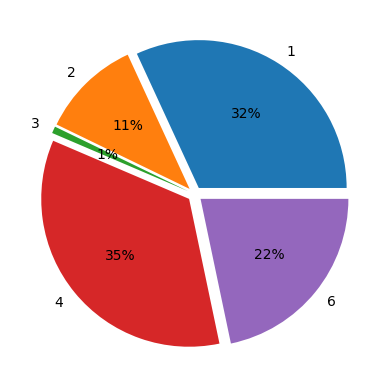

In [20]:
import matplotlib.pyplot as plt
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(kohli_run_list,labels=[1,2,3,4,6],explode=explode,autopct='%.0f%%')
plt.show()

In [21]:
'''import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Create the dataframe
df = pd.DataFrame([['a1','a2','a3'], ['b1','b2','b3'], ['c1','c2','c3']], index=['a', 'b', 'c']).transpose()

# Define the first dropdown widget
widget1 = widgets.Dropdown(options=['a', 'b', 'c'])

# Define the second dropdown widget
widget2 = widgets.Dropdown()

# Define a function that updates the content of widget2 based on what value is selected for widget1
def update(*args):
    widget2.options = df[widget1.value].unique().tolist()

# Observe changes in widget1 and update widget2 accordingly
widget1.observe(update)

# Define the function that you want to execute with the selected values
def my_function(widget1_value, widget2_value):
    print(f'Widget 1 value: {widget1_value}')
    print(f'Widget 2 value: {widget2_value}')

# Call the function with the selected values when a button is clicked
button = widgets.Button(description='Run Function')
output = widgets.Output()
def on_button_clicked(b):
    with output:
        my_function(widget1.value, widget2.value)
button.on_click(on_button_clicked)

# Display the widgets and button
display(widget1)
display(widget2)
display(button)
output
'''
pass

In [22]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [23]:
toss_descision_df = match_df.groupby(['season','toss_decision'])['toss_decision'].value_counts().reset_index()
toss_descision_df.head()

season toss_decision  count
0    2008           bat     26
1    2008         field     32
2    2009           bat     35
3    2009         field     22
4    2010           bat     39

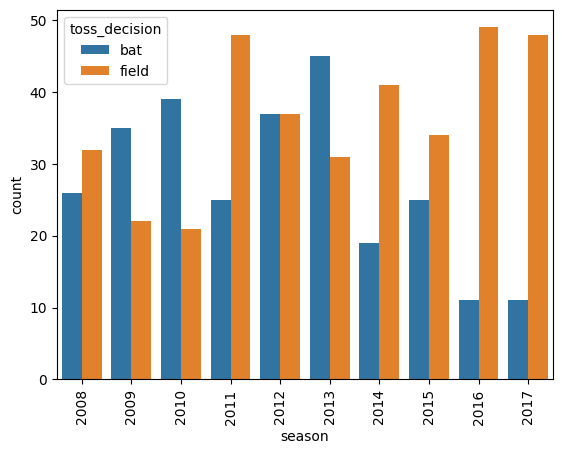

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=toss_descision_df,x='season',y='count',hue='toss_decision')
plt.xticks(rotation='vertical')
plt.show()

In [25]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [26]:
sample_df = match_df.filter(['team1','team2','toss_winner','winner'],axis=1)
sample_df['toss_win_game_win'] = np.where(sample_df['toss_winner']==sample_df['winner'],'Yes','No')
sample_df.head()

team1                        team2  \
0          Sunrisers Hyderabad  Royal Challengers Bangalore   
1               Mumbai Indians       Rising Pune Supergiant   
2                Gujarat Lions        Kolkata Knight Riders   
3       Rising Pune Supergiant              Kings XI Punjab   
4  Royal Challengers Bangalore             Delhi Daredevils   

                   toss_winner                       winner toss_win_game_win  
0  Royal Challengers Bangalore          Sunrisers Hyderabad                No  
1       Rising Pune Supergiant       Rising Pune Supergiant               Yes  
2        Kolkata Knight Riders        Kolkata Knight Riders               Yes  
3              Kings XI Punjab              Kings XI Punjab               Yes  
4  Royal Challengers Bangalore  Royal Challengers Bangalore               Yes

In [27]:
sample_df['toss_win_game_win'].value_counts()

toss_win_game_win
Yes    325
No     311
Name: count, dtype: int64

In [31]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode,plot,iplot
labels = sample_df['toss_win_game_win'].value_counts().index
values = sample_df['toss_win_game_win'].value_counts().values
trace = go.Pie(labels=labels,values=values,hole=0.3)
data = [trace]
fig = go.Figure(data=data)
fig.update_traces(hoverinfo='label+percent',textinfo='label+percent')

Q.Find the number of times a team have won the the IPL title.

In [32]:
#NOTE: Last match winner team is actually the winner of a paticular season.
winner_team = {}
for year in sorted(match_df['season'].unique()):
    current_year_df = match_df[match_df['season']==year]
    winner_team[year] = current_year_df['winner'].tail(1).values[0]
from collections import Counter
Counter(winner_team.values())

Counter({'Mumbai Indians': 3,
         'Chennai Super Kings': 2,
         'Kolkata Knight Riders': 2,
         'Rajasthan Royals': 1,
         'Deccan Chargers': 1,
         'Sunrisers Hyderabad': 1})

Q.Which teams have most numbers of match wins vs total played match.

In [35]:
#NOTE: we need a new DataFrame in which columns will be [team_name,played_matches,matches_won]
matches_played_df = match_df['team1'].value_counts()+match_df['team2'].value_counts()
matches_played_df = matches_played_df.reset_index().rename(columns={'index':'Team','count':'Match_Played'})
matches_played_df

Team  Match_Played
0           Chennai Super Kings           131
1               Deccan Chargers            75
2              Delhi Daredevils           147
3                 Gujarat Lions            30
4               Kings XI Punjab           148
5          Kochi Tuskers Kerala            14
6         Kolkata Knight Riders           148
7                Mumbai Indians           157
8                 Pune Warriors            46
9              Rajasthan Royals           118
10       Rising Pune Supergiant            16
11      Rising Pune Supergiants            14
12  Royal Challengers Bangalore           152
13          Sunrisers Hyderabad            76

In [37]:
#Now add the corresponding winner counts for each team.
won_df = match_df['winner'].value_counts().reset_index().rename(columns={'winner':'Team','count':'Matches_won'})
won_df

Team  Matches_won
0                Mumbai Indians           92
1           Chennai Super Kings           79
2         Kolkata Knight Riders           77
3   Royal Challengers Bangalore           73
4               Kings XI Punjab           70
5              Rajasthan Royals           63
6              Delhi Daredevils           62
7           Sunrisers Hyderabad           42
8               Deccan Chargers           29
9                 Gujarat Lions           13
10                Pune Warriors           12
11       Rising Pune Supergiant           10
12         Kochi Tuskers Kerala            6
13      Rising Pune Supergiants            5

In [38]:
# Now we will join won_df and matches_played_df based on Team name
result_df = matches_played_df.merge(won_df,how='inner',on='Team')
result_df

Team  Match_Played  Matches_won
0           Chennai Super Kings           131           79
1               Deccan Chargers            75           29
2              Delhi Daredevils           147           62
3                 Gujarat Lions            30           13
4               Kings XI Punjab           148           70
5          Kochi Tuskers Kerala            14            6
6         Kolkata Knight Riders           148           77
7                Mumbai Indians           157           92
8                 Pune Warriors            46           12
9              Rajasthan Royals           118           63
10       Rising Pune Supergiant            16           10
11      Rising Pune Supergiants            14            5
12  Royal Challengers Bangalore           152           73
13          Sunrisers Hyderabad            76           42

In [39]:
result_df['%Winning'] = round((result_df['Matches_won']/result_df['Match_Played'])*100,2)
result_df

Team  Match_Played  Matches_won  %Winning
0           Chennai Super Kings           131           79     60.31
1               Deccan Chargers            75           29     38.67
2              Delhi Daredevils           147           62     42.18
3                 Gujarat Lions            30           13     43.33
4               Kings XI Punjab           148           70     47.30
5          Kochi Tuskers Kerala            14            6     42.86
6         Kolkata Knight Riders           148           77     52.03
7                Mumbai Indians           157           92     58.60
8                 Pune Warriors            46           12     26.09
9              Rajasthan Royals           118           63     53.39
10       Rising Pune Supergiant            16           10     62.50
11      Rising Pune Supergiants            14            5     35.71
12  Royal Challengers Bangalore           152           73     48.03
13          Sunrisers Hyderabad            76           42     55.26

In [43]:
trace1 = go.Bar(x=result_df['Team'],y=result_df['Match_Played'],name='Total Played')
trace2 = go.Bar(x=result_df['Team'],y=result_df['Matches_won'],name='Total Won')
data = [trace1,trace2]
iplot(data)

# The END